In [76]:
from ecell4 import *
%matplotlib inline
import numpy as np
import math
import sys
from math import sqrt
import matplotlib.pyplot as plt
from ecell4.extra import ensemble
import numpy as np
from math import pi

def wrap(job,job_id,task_id):
    def singlerun(ka,NA,L,run,duration,rm):
        import numpy as np
        D=1
        rng = GSLRandomNumberGenerator()
        rng.seed(run)   
        voxelr=rm    
        td =(2*voxelr)**2/(6*D)
        ori = Real3(0.5*L*2,0,0)
        unit0 = Real3(0,0,L)
        unit1 = Real3(0,L,0)        
        w = spatiocyte.SpatiocyteWorld(Real3(L*2,L,L),voxelr,rng)
        size=tuple(w.calculate_shape(Real3(L*2,L,L),voxelr))
        lx,ly,lz=w.actual_lengths()
        Ns = size[1]*size[2]
        Area= ly*lz
        V=ly*lz*lx
        if run==1:
            print('actual A {}, V{},Ns{},td{}'.format(Area,V,Ns,td))
        w.add_structure(Species('M'),PlanarSurface(ori,unit0,unit1))
        with species_attributes():
            A |  {'D': str(D), 'radius':str(voxelr)}
            #B |  {'D': str(0), 'radius':str(voxelr),'location':'M'}

        with reaction_rules():#for spa and egfrd
            #A + M > B | ka
            A+M>M | ka

        m2 = get_model()
        w.bind_to(m2)
        
        
        w.add_molecules(Species('A'), NA)
        sim = spatiocyte.SpatiocyteSimulator(w)
        sim.initialize()
        obs=FixedIntervalNumberObserver(td*500,['A'])
        sim.run(duration,obs)        
        tlogs,nalog=np.array(obs.data()).T
        return tlogs,nalog,V,Area,Ns
    job.update({'run':task_id})
    out=singlerun(**job)
    return out


L=4**(1./3)#2.
dur=0.2
NA = 400
rm=0.005
simrun = 5000
ka=10

TT=[]
NTs=[]
Vs = []
As=[]
Nss=[]
Stds=[]
print('ka',ka,'Na',NA)
rms=[0.003,0.008]
#for ka in kas:
for rm in rms:
    jobs = [{'ka':ka,'NA':NA,'L':L,'duration':dur,'rm':rm}]
    #res=ensemble.run_multiprocessing(wrap,jobs,n=simrun,nproc=60,modules=('numpy','ecell4','math'))[0]
    res=ensemble.run_slurm(wrap,jobs,n=simrun,nproc=500,path='tmp',modules=('numpy','ecell4','math'),extra_args=['--exclude=ibc[02,12,27]'])[0]
    res = np.array(res)
    T = res.T[0][0]
    Nt = np.mean(res.T[1])
    std = np.std(res.T[1])
    Vs.append(res.T[2][0])
    As.append(res.T[3][0])
    Nss.append(res.T[4][0])
    TT.append(T)
    NTs.append(Nt)
    Stds.append(std)
print('finish')

DEBUG:matplotlib.backends:backend module://ipykernel.pylab.backend_inline version unknown


ka 10 Na 400


DEBUG:sge:Submitted batch job 2624829
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:2624829_[1-5000%50     debug sge-hy8e     chew PD       0:00      1 (None)
DEBUG:sge:
INFO:sge:Job 2624829 must be queued, running or being transferred
INFO:sge:Waiting for jobids [2624829] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:2624829_[385-5000%     debug sge-hy8e     chew PD       0:00      1 (None)
DEBUG:sge:         2624829_1     debug sge-hy8e     chew  R       0:09      1 ibc01
DEBUG:sge:         2624829_2     debug sge-hy8e     chew  R       0:09      1 ibc01
DEBUG:sge:         2624829_3     debug sge-hy8e     chew  R       0:09      1 ibc01
DEBUG:sge:         2624829_4     debug sge-hy8e     chew  R       0:09      1 ibc01
DEBUG:sge:         2624829_5     debug sge-hy8e     chew  R       0:09      1 ibc01
DEBUG:sge:         2624829_6     debug sge-hy8e     chew 

DEBUG:sge:        2624829_93     debug sge-hy8e     chew  R       0:09      1 ibc06
DEBUG:sge:        2624829_94     debug sge-hy8e     chew  R       0:09      1 ibc06
DEBUG:sge:        2624829_95     debug sge-hy8e     chew  R       0:09      1 ibc06
DEBUG:sge:        2624829_96     debug sge-hy8e     chew  R       0:09      1 ibc06
DEBUG:sge:        2624829_97     debug sge-hy8e     chew  R       0:09      1 ibc07
DEBUG:sge:        2624829_98     debug sge-hy8e     chew  R       0:09      1 ibc07
DEBUG:sge:        2624829_99     debug sge-hy8e     chew  R       0:09      1 ibc07
DEBUG:sge:       2624829_100     debug sge-hy8e     chew  R       0:09      1 ibc07
DEBUG:sge:       2624829_101     debug sge-hy8e     chew  R       0:09      1 ibc07
DEBUG:sge:       2624829_102     debug sge-hy8e     chew  R       0:09      1 ibc07
DEBUG:sge:       2624829_103     debug sge-hy8e     chew  R       0:09      1 ibc07
DEBUG:sge:       2624829_104     debug sge-hy8e     chew  R       0:09      

DEBUG:sge:       2624829_191     debug sge-hy8e     chew  R       0:09      1 ibc14
DEBUG:sge:       2624829_192     debug sge-hy8e     chew  R       0:09      1 ibc14
DEBUG:sge:       2624829_193     debug sge-hy8e     chew  R       0:09      1 ibc15
DEBUG:sge:       2624829_194     debug sge-hy8e     chew  R       0:09      1 ibc15
DEBUG:sge:       2624829_195     debug sge-hy8e     chew  R       0:09      1 ibc15
DEBUG:sge:       2624829_196     debug sge-hy8e     chew  R       0:09      1 ibc15
DEBUG:sge:       2624829_197     debug sge-hy8e     chew  R       0:09      1 ibc15
DEBUG:sge:       2624829_198     debug sge-hy8e     chew  R       0:09      1 ibc15
DEBUG:sge:       2624829_199     debug sge-hy8e     chew  R       0:09      1 ibc15
DEBUG:sge:       2624829_200     debug sge-hy8e     chew  R       0:09      1 ibc15
DEBUG:sge:       2624829_201     debug sge-hy8e     chew  R       0:09      1 ibc15
DEBUG:sge:       2624829_202     debug sge-hy8e     chew  R       0:09      

DEBUG:sge:       2624829_288     debug sge-hy8e     chew  R       0:09      1 ibc20
DEBUG:sge:       2624829_289     debug sge-hy8e     chew  R       0:09      1 ibc21
DEBUG:sge:       2624829_290     debug sge-hy8e     chew  R       0:09      1 ibc21
DEBUG:sge:       2624829_291     debug sge-hy8e     chew  R       0:09      1 ibc21
DEBUG:sge:       2624829_292     debug sge-hy8e     chew  R       0:09      1 ibc21
DEBUG:sge:       2624829_293     debug sge-hy8e     chew  R       0:09      1 ibc21
DEBUG:sge:       2624829_294     debug sge-hy8e     chew  R       0:09      1 ibc21
DEBUG:sge:       2624829_295     debug sge-hy8e     chew  R       0:09      1 ibc21
DEBUG:sge:       2624829_296     debug sge-hy8e     chew  R       0:09      1 ibc21
DEBUG:sge:       2624829_297     debug sge-hy8e     chew  R       0:09      1 ibc21
DEBUG:sge:       2624829_298     debug sge-hy8e     chew  R       0:09      1 ibc21
DEBUG:sge:       2624829_299     debug sge-hy8e     chew  R       0:09      

INFO:sge:Waiting for jobids [2624829] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:2624829_[769-5000%     debug sge-hy8e     chew PD       0:00      1 (Resources)
DEBUG:sge:       2624829_768     debug sge-hy8e     chew  R       0:05      1 ibc10
DEBUG:sge:       2624829_766     debug sge-hy8e     chew  R       0:06      1 ibc06
DEBUG:sge:       2624829_767     debug sge-hy8e     chew  R       0:06      1 ibc10
DEBUG:sge:       2624829_399     debug sge-hy8e     chew  R       0:07      1 ibc03
DEBUG:sge:       2624829_400     debug sge-hy8e     chew  R       0:07      1 ibc19
DEBUG:sge:       2624829_401     debug sge-hy8e     chew  R       0:07      1 ibc22
DEBUG:sge:       2624829_402     debug sge-hy8e     chew  R       0:07      1 ibc11
DEBUG:sge:       2624829_403     debug sge-hy8e     chew  R       0:07      1 ibc22
DEBUG:sge:       2624829_404     debug sge-hy8e     chew  R       0:07      1 ibc03
DEBUG:sge: 

DEBUG:sge:       2624829_491     debug sge-hy8e     chew  R       0:07      1 ibc14
DEBUG:sge:       2624829_492     debug sge-hy8e     chew  R       0:07      1 ibc19
DEBUG:sge:       2624829_493     debug sge-hy8e     chew  R       0:07      1 ibc20
DEBUG:sge:       2624829_494     debug sge-hy8e     chew  R       0:07      1 ibc15
DEBUG:sge:       2624829_495     debug sge-hy8e     chew  R       0:07      1 ibc16
DEBUG:sge:       2624829_496     debug sge-hy8e     chew  R       0:07      1 ibc16
DEBUG:sge:       2624829_497     debug sge-hy8e     chew  R       0:07      1 ibc16
DEBUG:sge:       2624829_498     debug sge-hy8e     chew  R       0:07      1 ibc17
DEBUG:sge:       2624829_499     debug sge-hy8e     chew  R       0:07      1 ibc17
DEBUG:sge:       2624829_500     debug sge-hy8e     chew  R       0:07      1 ibc17
DEBUG:sge:       2624829_501     debug sge-hy8e     chew  R       0:07      1 ibc23
DEBUG:sge:       2624829_502     debug sge-hy8e     chew  R       0:07      

DEBUG:sge:       2624829_589     debug sge-hy8e     chew  R       0:07      1 ibc24
DEBUG:sge:       2624829_590     debug sge-hy8e     chew  R       0:07      1 ibc15
DEBUG:sge:       2624829_591     debug sge-hy8e     chew  R       0:07      1 ibc03
DEBUG:sge:       2624829_592     debug sge-hy8e     chew  R       0:07      1 ibc03
DEBUG:sge:       2624829_593     debug sge-hy8e     chew  R       0:07      1 ibc07
DEBUG:sge:       2624829_594     debug sge-hy8e     chew  R       0:07      1 ibc07
DEBUG:sge:       2624829_595     debug sge-hy8e     chew  R       0:07      1 ibc07
DEBUG:sge:       2624829_596     debug sge-hy8e     chew  R       0:07      1 ibc07
DEBUG:sge:       2624829_597     debug sge-hy8e     chew  R       0:07      1 ibc07
DEBUG:sge:       2624829_598     debug sge-hy8e     chew  R       0:07      1 ibc07
DEBUG:sge:       2624829_599     debug sge-hy8e     chew  R       0:07      1 ibc07
DEBUG:sge:       2624829_600     debug sge-hy8e     chew  R       0:07      

DEBUG:sge:       2624829_687     debug sge-hy8e     chew  R       0:07      1 ibc05
DEBUG:sge:       2624829_688     debug sge-hy8e     chew  R       0:07      1 ibc03
DEBUG:sge:       2624829_689     debug sge-hy8e     chew  R       0:07      1 ibc18
DEBUG:sge:       2624829_690     debug sge-hy8e     chew  R       0:07      1 ibc18
DEBUG:sge:       2624829_691     debug sge-hy8e     chew  R       0:07      1 ibc24
DEBUG:sge:       2624829_692     debug sge-hy8e     chew  R       0:07      1 ibc24
DEBUG:sge:       2624829_693     debug sge-hy8e     chew  R       0:07      1 ibc08
DEBUG:sge:       2624829_694     debug sge-hy8e     chew  R       0:07      1 ibc08
DEBUG:sge:       2624829_695     debug sge-hy8e     chew  R       0:07      1 ibc08
DEBUG:sge:       2624829_696     debug sge-hy8e     chew  R       0:07      1 ibc13
DEBUG:sge:       2624829_697     debug sge-hy8e     chew  R       0:07      1 ibc10
DEBUG:sge:       2624829_698     debug sge-hy8e     chew  R       0:07      

DEBUG:sge:      2624829_1151     debug sge-hy8e     chew  R       0:01      1 ibc07
DEBUG:sge:      2624829_1152     debug sge-hy8e     chew  R       0:01      1 ibc10
DEBUG:sge:      2624829_1078     debug sge-hy8e     chew  R       0:02      1 ibc23
DEBUG:sge:      2624829_1079     debug sge-hy8e     chew  R       0:02      1 ibc23
DEBUG:sge:      2624829_1080     debug sge-hy8e     chew  R       0:02      1 ibc23
DEBUG:sge:      2624829_1081     debug sge-hy8e     chew  R       0:02      1 ibc23
DEBUG:sge:      2624829_1082     debug sge-hy8e     chew  R       0:02      1 ibc23
DEBUG:sge:      2624829_1083     debug sge-hy8e     chew  R       0:02      1 ibc23
DEBUG:sge:      2624829_1084     debug sge-hy8e     chew  R       0:02      1 ibc23
DEBUG:sge:      2624829_1085     debug sge-hy8e     chew  R       0:02      1 ibc23
DEBUG:sge:      2624829_1086     debug sge-hy8e     chew  R       0:02      1 ibc25
DEBUG:sge:      2624829_1087     debug sge-hy8e     chew  R       0:02      

DEBUG:sge:       2624829_907     debug sge-hy8e     chew  R       0:03      1 ibc01
DEBUG:sge:       2624829_908     debug sge-hy8e     chew  R       0:03      1 ibc05
DEBUG:sge:       2624829_909     debug sge-hy8e     chew  R       0:03      1 ibc05
DEBUG:sge:       2624829_910     debug sge-hy8e     chew  R       0:03      1 ibc17
DEBUG:sge:       2624829_911     debug sge-hy8e     chew  R       0:03      1 ibc17
DEBUG:sge:       2624829_912     debug sge-hy8e     chew  R       0:03      1 ibc07
DEBUG:sge:       2624829_913     debug sge-hy8e     chew  R       0:03      1 ibc11
DEBUG:sge:       2624829_914     debug sge-hy8e     chew  R       0:03      1 ibc11
DEBUG:sge:       2624829_915     debug sge-hy8e     chew  R       0:03      1 ibc11
DEBUG:sge:       2624829_916     debug sge-hy8e     chew  R       0:03      1 ibc11
DEBUG:sge:       2624829_917     debug sge-hy8e     chew  R       0:03      1 ibc11
DEBUG:sge:       2624829_918     debug sge-hy8e     chew  R       0:03      

DEBUG:sge:      2624829_1005     debug sge-hy8e     chew  R       0:03      1 ibc22
DEBUG:sge:      2624829_1006     debug sge-hy8e     chew  R       0:03      1 ibc10
DEBUG:sge:      2624829_1007     debug sge-hy8e     chew  R       0:03      1 ibc10
DEBUG:sge:      2624829_1008     debug sge-hy8e     chew  R       0:03      1 ibc03
DEBUG:sge:      2624829_1009     debug sge-hy8e     chew  R       0:03      1 ibc21
DEBUG:sge:      2624829_1010     debug sge-hy8e     chew  R       0:03      1 ibc24
DEBUG:sge:      2624829_1011     debug sge-hy8e     chew  R       0:03      1 ibc07
DEBUG:sge:      2624829_1012     debug sge-hy8e     chew  R       0:03      1 ibc07
DEBUG:sge:      2624829_1013     debug sge-hy8e     chew  R       0:03      1 ibc13
DEBUG:sge:      2624829_1014     debug sge-hy8e     chew  R       0:03      1 ibc10
DEBUG:sge:      2624829_1015     debug sge-hy8e     chew  R       0:03      1 ibc17
DEBUG:sge:      2624829_1016     debug sge-hy8e     chew  R       0:03      

DEBUG:sge:       2624829_794     debug sge-hy8e     chew  R       0:04      1 ibc26
DEBUG:sge:       2624829_795     debug sge-hy8e     chew  R       0:04      1 ibc05
DEBUG:sge:       2624829_796     debug sge-hy8e     chew  R       0:04      1 ibc08
DEBUG:sge:       2624829_797     debug sge-hy8e     chew  R       0:04      1 ibc20
DEBUG:sge:       2624829_798     debug sge-hy8e     chew  R       0:04      1 ibc14
DEBUG:sge:       2624829_799     debug sge-hy8e     chew  R       0:04      1 ibc13
DEBUG:sge:       2624829_800     debug sge-hy8e     chew  R       0:04      1 ibc01
DEBUG:sge:       2624829_801     debug sge-hy8e     chew  R       0:04      1 ibc18
DEBUG:sge:       2624829_802     debug sge-hy8e     chew  R       0:04      1 ibc21
DEBUG:sge:       2624829_803     debug sge-hy8e     chew  R       0:04      1 ibc21
DEBUG:sge:       2624829_804     debug sge-hy8e     chew  R       0:04      1 ibc11
DEBUG:sge:       2624829_805     debug sge-hy8e     chew  R       0:04      

DEBUG:sge:      2624829_1080     debug sge-hy8e     chew  R       0:12      1 ibc23
DEBUG:sge:      2624829_1081     debug sge-hy8e     chew  R       0:12      1 ibc23
DEBUG:sge:      2624829_1082     debug sge-hy8e     chew  R       0:12      1 ibc23
DEBUG:sge:      2624829_1083     debug sge-hy8e     chew  R       0:12      1 ibc23
DEBUG:sge:      2624829_1084     debug sge-hy8e     chew  R       0:12      1 ibc23
DEBUG:sge:      2624829_1085     debug sge-hy8e     chew  R       0:12      1 ibc23
DEBUG:sge:      2624829_1086     debug sge-hy8e     chew  R       0:12      1 ibc25
DEBUG:sge:      2624829_1087     debug sge-hy8e     chew  R       0:12      1 ibc25
DEBUG:sge:      2624829_1088     debug sge-hy8e     chew  R       0:12      1 ibc25
DEBUG:sge:      2624829_1089     debug sge-hy8e     chew  R       0:12      1 ibc25
DEBUG:sge:      2624829_1090     debug sge-hy8e     chew  R       0:12      1 ibc25
DEBUG:sge:      2624829_1091     debug sge-hy8e     chew  R       0:12      

DEBUG:sge:       2624829_911     debug sge-hy8e     chew  R       0:13      1 ibc17
DEBUG:sge:       2624829_912     debug sge-hy8e     chew  R       0:13      1 ibc07
DEBUG:sge:       2624829_913     debug sge-hy8e     chew  R       0:13      1 ibc11
DEBUG:sge:       2624829_914     debug sge-hy8e     chew  R       0:13      1 ibc11
DEBUG:sge:       2624829_915     debug sge-hy8e     chew  R       0:13      1 ibc11
DEBUG:sge:       2624829_916     debug sge-hy8e     chew  R       0:13      1 ibc11
DEBUG:sge:       2624829_917     debug sge-hy8e     chew  R       0:13      1 ibc11
DEBUG:sge:       2624829_918     debug sge-hy8e     chew  R       0:13      1 ibc11
DEBUG:sge:       2624829_919     debug sge-hy8e     chew  R       0:13      1 ibc22
DEBUG:sge:       2624829_920     debug sge-hy8e     chew  R       0:13      1 ibc08
DEBUG:sge:       2624829_921     debug sge-hy8e     chew  R       0:13      1 ibc08
DEBUG:sge:       2624829_922     debug sge-hy8e     chew  R       0:13      

DEBUG:sge:      2624829_1009     debug sge-hy8e     chew  R       0:13      1 ibc21
DEBUG:sge:      2624829_1010     debug sge-hy8e     chew  R       0:13      1 ibc24
DEBUG:sge:      2624829_1011     debug sge-hy8e     chew  R       0:13      1 ibc07
DEBUG:sge:      2624829_1012     debug sge-hy8e     chew  R       0:13      1 ibc07
DEBUG:sge:      2624829_1013     debug sge-hy8e     chew  R       0:13      1 ibc13
DEBUG:sge:      2624829_1014     debug sge-hy8e     chew  R       0:13      1 ibc10
DEBUG:sge:      2624829_1015     debug sge-hy8e     chew  R       0:13      1 ibc17
DEBUG:sge:      2624829_1016     debug sge-hy8e     chew  R       0:13      1 ibc13
DEBUG:sge:      2624829_1017     debug sge-hy8e     chew  R       0:13      1 ibc22
DEBUG:sge:      2624829_1018     debug sge-hy8e     chew  R       0:13      1 ibc21
DEBUG:sge:      2624829_1019     debug sge-hy8e     chew  R       0:13      1 ibc21
DEBUG:sge:      2624829_1020     debug sge-hy8e     chew  R       0:13      

DEBUG:sge:       2624829_798     debug sge-hy8e     chew  R       0:14      1 ibc14
DEBUG:sge:       2624829_799     debug sge-hy8e     chew  R       0:14      1 ibc13
DEBUG:sge:       2624829_800     debug sge-hy8e     chew  R       0:14      1 ibc01
DEBUG:sge:       2624829_801     debug sge-hy8e     chew  R       0:14      1 ibc18
DEBUG:sge:       2624829_802     debug sge-hy8e     chew  R       0:14      1 ibc21
DEBUG:sge:       2624829_803     debug sge-hy8e     chew  R       0:14      1 ibc21
DEBUG:sge:       2624829_804     debug sge-hy8e     chew  R       0:14      1 ibc11
DEBUG:sge:       2624829_805     debug sge-hy8e     chew  R       0:14      1 ibc20
DEBUG:sge:       2624829_806     debug sge-hy8e     chew  R       0:14      1 ibc08
DEBUG:sge:       2624829_807     debug sge-hy8e     chew  R       0:14      1 ibc08
DEBUG:sge:       2624829_808     debug sge-hy8e     chew  R       0:14      1 ibc01
DEBUG:sge:       2624829_809     debug sge-hy8e     chew  R       0:14      

DEBUG:sge:      2624829_1529     debug sge-hy8e     chew  R       0:08      1 ibc20
DEBUG:sge:      2624829_1530     debug sge-hy8e     chew  R       0:08      1 ibc15
DEBUG:sge:      2624829_1531     debug sge-hy8e     chew  R       0:08      1 ibc16
DEBUG:sge:      2624829_1532     debug sge-hy8e     chew  R       0:08      1 ibc25
DEBUG:sge:      2624829_1533     debug sge-hy8e     chew  R       0:08      1 ibc20
DEBUG:sge:      2624829_1534     debug sge-hy8e     chew  R       0:08      1 ibc20
DEBUG:sge:      2624829_1535     debug sge-hy8e     chew  R       0:08      1 ibc16
DEBUG:sge:      2624829_1436     debug sge-hy8e     chew  R       0:09      1 ibc06
DEBUG:sge:      2624829_1437     debug sge-hy8e     chew  R       0:09      1 ibc20
DEBUG:sge:      2624829_1438     debug sge-hy8e     chew  R       0:09      1 ibc28
DEBUG:sge:      2624829_1439     debug sge-hy8e     chew  R       0:09      1 ibc05
DEBUG:sge:      2624829_1440     debug sge-hy8e     chew  R       0:09      

DEBUG:sge:      2624829_1160     debug sge-hy8e     chew  R       0:10      1 ibc23
DEBUG:sge:      2624829_1161     debug sge-hy8e     chew  R       0:10      1 ibc23
DEBUG:sge:      2624829_1162     debug sge-hy8e     chew  R       0:10      1 ibc23
DEBUG:sge:      2624829_1163     debug sge-hy8e     chew  R       0:10      1 ibc03
DEBUG:sge:      2624829_1164     debug sge-hy8e     chew  R       0:10      1 ibc03
DEBUG:sge:      2624829_1165     debug sge-hy8e     chew  R       0:10      1 ibc03
DEBUG:sge:      2624829_1166     debug sge-hy8e     chew  R       0:10      1 ibc10
DEBUG:sge:      2624829_1167     debug sge-hy8e     chew  R       0:10      1 ibc17
DEBUG:sge:      2624829_1168     debug sge-hy8e     chew  R       0:10      1 ibc03
DEBUG:sge:      2624829_1169     debug sge-hy8e     chew  R       0:10      1 ibc10
DEBUG:sge:      2624829_1170     debug sge-hy8e     chew  R       0:10      1 ibc03
DEBUG:sge:      2624829_1171     debug sge-hy8e     chew  R       0:10      

DEBUG:sge:      2624829_1258     debug sge-hy8e     chew  R       0:10      1 ibc11
DEBUG:sge:      2624829_1259     debug sge-hy8e     chew  R       0:10      1 ibc14
DEBUG:sge:      2624829_1260     debug sge-hy8e     chew  R       0:10      1 ibc15
DEBUG:sge:      2624829_1261     debug sge-hy8e     chew  R       0:10      1 ibc04
DEBUG:sge:      2624829_1262     debug sge-hy8e     chew  R       0:10      1 ibc08
DEBUG:sge:      2624829_1263     debug sge-hy8e     chew  R       0:10      1 ibc11
DEBUG:sge:      2624829_1264     debug sge-hy8e     chew  R       0:10      1 ibc19
DEBUG:sge:      2624829_1265     debug sge-hy8e     chew  R       0:10      1 ibc24
DEBUG:sge:      2624829_1266     debug sge-hy8e     chew  R       0:10      1 ibc13
DEBUG:sge:      2624829_1267     debug sge-hy8e     chew  R       0:10      1 ibc14
DEBUG:sge:      2624829_1268     debug sge-hy8e     chew  R       0:10      1 ibc22
DEBUG:sge:      2624829_1269     debug sge-hy8e     chew  R       0:10      

DEBUG:sge:      2624829_1356     debug sge-hy8e     chew  R       0:10      1 ibc26
DEBUG:sge:      2624829_1357     debug sge-hy8e     chew  R       0:10      1 ibc01
DEBUG:sge:      2624829_1358     debug sge-hy8e     chew  R       0:10      1 ibc01
DEBUG:sge:      2624829_1359     debug sge-hy8e     chew  R       0:10      1 ibc15
DEBUG:sge:      2624829_1360     debug sge-hy8e     chew  R       0:10      1 ibc25
DEBUG:sge:      2624829_1361     debug sge-hy8e     chew  R       0:10      1 ibc25
DEBUG:sge:      2624829_1362     debug sge-hy8e     chew  R       0:10      1 ibc07
DEBUG:sge:      2624829_1363     debug sge-hy8e     chew  R       0:10      1 ibc14
DEBUG:sge:      2624829_1364     debug sge-hy8e     chew  R       0:10      1 ibc28
DEBUG:sge:      2624829_1365     debug sge-hy8e     chew  R       0:10      1 ibc28
DEBUG:sge:      2624829_1366     debug sge-hy8e     chew  R       0:10      1 ibc13
DEBUG:sge:      2624829_1367     debug sge-hy8e     chew  R       0:10      

DEBUG:sge:      2624829_1892     debug sge-hy8e     chew  R       0:03      1 ibc10
DEBUG:sge:      2624829_1893     debug sge-hy8e     chew  R       0:03      1 ibc13
DEBUG:sge:      2624829_1894     debug sge-hy8e     chew  R       0:03      1 ibc28
DEBUG:sge:      2624829_1895     debug sge-hy8e     chew  R       0:03      1 ibc17
DEBUG:sge:      2624829_1896     debug sge-hy8e     chew  R       0:03      1 ibc28
DEBUG:sge:      2624829_1897     debug sge-hy8e     chew  R       0:03      1 ibc17
DEBUG:sge:      2624829_1898     debug sge-hy8e     chew  R       0:03      1 ibc19
DEBUG:sge:      2624829_1899     debug sge-hy8e     chew  R       0:03      1 ibc11
DEBUG:sge:      2624829_1900     debug sge-hy8e     chew  R       0:03      1 ibc13
DEBUG:sge:      2624829_1901     debug sge-hy8e     chew  R       0:03      1 ibc22
DEBUG:sge:      2624829_1902     debug sge-hy8e     chew  R       0:03      1 ibc10
DEBUG:sge:      2624829_1903     debug sge-hy8e     chew  R       0:03      

DEBUG:sge:      2624829_1776     debug sge-hy8e     chew  R       0:04      1 ibc22
DEBUG:sge:      2624829_1777     debug sge-hy8e     chew  R       0:04      1 ibc28
DEBUG:sge:      2624829_1778     debug sge-hy8e     chew  R       0:04      1 ibc24
DEBUG:sge:      2624829_1779     debug sge-hy8e     chew  R       0:04      1 ibc24
DEBUG:sge:      2624829_1780     debug sge-hy8e     chew  R       0:04      1 ibc24
DEBUG:sge:      2624829_1781     debug sge-hy8e     chew  R       0:04      1 ibc24
DEBUG:sge:      2624829_1782     debug sge-hy8e     chew  R       0:04      1 ibc24
DEBUG:sge:      2624829_1783     debug sge-hy8e     chew  R       0:04      1 ibc15
DEBUG:sge:      2624829_1784     debug sge-hy8e     chew  R       0:04      1 ibc03
DEBUG:sge:      2624829_1785     debug sge-hy8e     chew  R       0:04      1 ibc04
DEBUG:sge:      2624829_1786     debug sge-hy8e     chew  R       0:04      1 ibc04
DEBUG:sge:      2624829_1787     debug sge-hy8e     chew  R       0:04      

DEBUG:sge:      2624829_1874     debug sge-hy8e     chew  R       0:04      1 ibc28
DEBUG:sge:      2624829_1875     debug sge-hy8e     chew  R       0:04      1 ibc10
DEBUG:sge:      2624829_1876     debug sge-hy8e     chew  R       0:04      1 ibc10
DEBUG:sge:      2624829_1877     debug sge-hy8e     chew  R       0:04      1 ibc19
DEBUG:sge:      2624829_1878     debug sge-hy8e     chew  R       0:04      1 ibc22
DEBUG:sge:      2624829_1879     debug sge-hy8e     chew  R       0:04      1 ibc22
DEBUG:sge:      2624829_1880     debug sge-hy8e     chew  R       0:04      1 ibc01
DEBUG:sge:      2624829_1881     debug sge-hy8e     chew  R       0:04      1 ibc22
DEBUG:sge:      2624829_1882     debug sge-hy8e     chew  R       0:04      1 ibc03
DEBUG:sge:      2624829_1883     debug sge-hy8e     chew  R       0:04      1 ibc03
DEBUG:sge:      2624829_1884     debug sge-hy8e     chew  R       0:04      1 ibc17
DEBUG:sge:      2624829_1537     debug sge-hy8e     chew  R       0:05      

DEBUG:sge:      2624829_1624     debug sge-hy8e     chew  R       0:05      1 ibc22
DEBUG:sge:      2624829_1625     debug sge-hy8e     chew  R       0:05      1 ibc17
DEBUG:sge:      2624829_1626     debug sge-hy8e     chew  R       0:05      1 ibc23
DEBUG:sge:      2624829_1627     debug sge-hy8e     chew  R       0:05      1 ibc23
DEBUG:sge:      2624829_1628     debug sge-hy8e     chew  R       0:05      1 ibc06
DEBUG:sge:      2624829_1629     debug sge-hy8e     chew  R       0:05      1 ibc20
DEBUG:sge:      2624829_1630     debug sge-hy8e     chew  R       0:05      1 ibc23
DEBUG:sge:      2624829_1631     debug sge-hy8e     chew  R       0:05      1 ibc05
DEBUG:sge:      2624829_1632     debug sge-hy8e     chew  R       0:05      1 ibc10
DEBUG:sge:      2624829_1633     debug sge-hy8e     chew  R       0:05      1 ibc10
DEBUG:sge:      2624829_1634     debug sge-hy8e     chew  R       0:05      1 ibc17
DEBUG:sge:      2624829_1635     debug sge-hy8e     chew  R       0:05      

DEBUG:sge:      2624829_1937     debug sge-hy8e     chew  R       0:00      1 ibc14
DEBUG:sge:      2624829_1938     debug sge-hy8e     chew  R       0:00      1 ibc24
DEBUG:sge:      2624829_1939     debug sge-hy8e     chew  R       0:00      1 ibc24
DEBUG:sge:      2624829_1940     debug sge-hy8e     chew  R       0:00      1 ibc03
DEBUG:sge:      2624829_1941     debug sge-hy8e     chew  R       0:00      1 ibc03
DEBUG:sge:      2624829_1942     debug sge-hy8e     chew  R       0:00      1 ibc03
DEBUG:sge:      2624829_1943     debug sge-hy8e     chew  R       0:00      1 ibc23
DEBUG:sge:      2624829_1944     debug sge-hy8e     chew  R       0:00      1 ibc05
DEBUG:sge:      2624829_1945     debug sge-hy8e     chew  R       0:00      1 ibc05
DEBUG:sge:      2624829_1946     debug sge-hy8e     chew  R       0:00      1 ibc03
DEBUG:sge:      2624829_1947     debug sge-hy8e     chew  R       0:00      1 ibc24
DEBUG:sge:      2624829_1948     debug sge-hy8e     chew  R       0:00      

DEBUG:sge:      2624829_1722     debug sge-hy8e     chew  R       0:14      1 ibc07
DEBUG:sge:      2624829_1724     debug sge-hy8e     chew  R       0:14      1 ibc06
DEBUG:sge:      2624829_1725     debug sge-hy8e     chew  R       0:14      1 ibc10
DEBUG:sge:      2624829_1726     debug sge-hy8e     chew  R       0:14      1 ibc20
DEBUG:sge:      2624829_1727     debug sge-hy8e     chew  R       0:14      1 ibc28
DEBUG:sge:      2624829_1728     debug sge-hy8e     chew  R       0:14      1 ibc20
DEBUG:sge:      2624829_1729     debug sge-hy8e     chew  R       0:14      1 ibc18
DEBUG:sge:      2624829_1730     debug sge-hy8e     chew  R       0:14      1 ibc01
DEBUG:sge:      2624829_1731     debug sge-hy8e     chew  R       0:14      1 ibc22
DEBUG:sge:      2624829_1732     debug sge-hy8e     chew  R       0:14      1 ibc17
DEBUG:sge:      2624829_1733     debug sge-hy8e     chew  R       0:14      1 ibc17
DEBUG:sge:      2624829_1734     debug sge-hy8e     chew  R       0:14      

DEBUG:sge:      2624829_1839     debug sge-hy8e     chew  R       0:14      1 ibc24
DEBUG:sge:      2624829_1840     debug sge-hy8e     chew  R       0:14      1 ibc08
DEBUG:sge:      2624829_1841     debug sge-hy8e     chew  R       0:14      1 ibc17
DEBUG:sge:      2624829_1845     debug sge-hy8e     chew  R       0:14      1 ibc01
DEBUG:sge:      2624829_1847     debug sge-hy8e     chew  R       0:14      1 ibc24
DEBUG:sge:      2624829_1848     debug sge-hy8e     chew  R       0:14      1 ibc06
DEBUG:sge:      2624829_1849     debug sge-hy8e     chew  R       0:14      1 ibc08
DEBUG:sge:      2624829_1850     debug sge-hy8e     chew  R       0:14      1 ibc06
DEBUG:sge:      2624829_1851     debug sge-hy8e     chew  R       0:14      1 ibc08
DEBUG:sge:      2624829_1852     debug sge-hy8e     chew  R       0:14      1 ibc18
DEBUG:sge:      2624829_1854     debug sge-hy8e     chew  R       0:14      1 ibc08
DEBUG:sge:      2624829_1855     debug sge-hy8e     chew  R       0:14      

DEBUG:sge:      2624829_1611     debug sge-hy8e     chew  R       0:15      1 ibc16
DEBUG:sge:      2624829_1612     debug sge-hy8e     chew  R       0:15      1 ibc19
DEBUG:sge:      2624829_1613     debug sge-hy8e     chew  R       0:15      1 ibc14
DEBUG:sge:      2624829_1614     debug sge-hy8e     chew  R       0:15      1 ibc10
DEBUG:sge:      2624829_1615     debug sge-hy8e     chew  R       0:15      1 ibc10
DEBUG:sge:      2624829_1616     debug sge-hy8e     chew  R       0:15      1 ibc26
DEBUG:sge:      2624829_1617     debug sge-hy8e     chew  R       0:15      1 ibc28
DEBUG:sge:      2624829_1618     debug sge-hy8e     chew  R       0:15      1 ibc14
DEBUG:sge:      2624829_1619     debug sge-hy8e     chew  R       0:15      1 ibc15
DEBUG:sge:      2624829_1620     debug sge-hy8e     chew  R       0:15      1 ibc25
DEBUG:sge:      2624829_1621     debug sge-hy8e     chew  R       0:15      1 ibc28
DEBUG:sge:      2624829_1622     debug sge-hy8e     chew  R       0:15      

DEBUG:sge:      2624829_2295     debug sge-hy8e     chew  R       0:08      1 ibc04
DEBUG:sge:      2624829_2296     debug sge-hy8e     chew  R       0:08      1 ibc07
DEBUG:sge:      2624829_2297     debug sge-hy8e     chew  R       0:08      1 ibc22
DEBUG:sge:      2624829_2298     debug sge-hy8e     chew  R       0:08      1 ibc20
DEBUG:sge:      2624829_2299     debug sge-hy8e     chew  R       0:08      1 ibc24
DEBUG:sge:      2624829_2300     debug sge-hy8e     chew  R       0:08      1 ibc11
DEBUG:sge:      2624829_2082     debug sge-hy8e     chew  R       0:09      1 ibc07
DEBUG:sge:      2624829_2083     debug sge-hy8e     chew  R       0:09      1 ibc19
DEBUG:sge:      2624829_2084     debug sge-hy8e     chew  R       0:09      1 ibc19
DEBUG:sge:      2624829_2085     debug sge-hy8e     chew  R       0:09      1 ibc11
DEBUG:sge:      2624829_2086     debug sge-hy8e     chew  R       0:09      1 ibc28
DEBUG:sge:      2624829_2087     debug sge-hy8e     chew  R       0:09      

DEBUG:sge:      2624829_2174     debug sge-hy8e     chew  R       0:09      1 ibc06
DEBUG:sge:      2624829_2175     debug sge-hy8e     chew  R       0:09      1 ibc28
DEBUG:sge:      2624829_2176     debug sge-hy8e     chew  R       0:09      1 ibc16
DEBUG:sge:      2624829_2177     debug sge-hy8e     chew  R       0:09      1 ibc28
DEBUG:sge:      2624829_2178     debug sge-hy8e     chew  R       0:09      1 ibc10
DEBUG:sge:      2624829_2179     debug sge-hy8e     chew  R       0:09      1 ibc28
DEBUG:sge:      2624829_2180     debug sge-hy8e     chew  R       0:09      1 ibc10
DEBUG:sge:      2624829_2181     debug sge-hy8e     chew  R       0:09      1 ibc18
DEBUG:sge:      2624829_2182     debug sge-hy8e     chew  R       0:09      1 ibc16
DEBUG:sge:      2624829_2183     debug sge-hy8e     chew  R       0:09      1 ibc20
DEBUG:sge:      2624829_2184     debug sge-hy8e     chew  R       0:09      1 ibc11
DEBUG:sge:      2624829_2185     debug sge-hy8e     chew  R       0:09      

DEBUG:sge:      2624829_2272     debug sge-hy8e     chew  R       0:09      1 ibc20
DEBUG:sge:      2624829_2273     debug sge-hy8e     chew  R       0:09      1 ibc20
DEBUG:sge:      2624829_2274     debug sge-hy8e     chew  R       0:09      1 ibc08
DEBUG:sge:      2624829_2275     debug sge-hy8e     chew  R       0:09      1 ibc14
DEBUG:sge:      2624829_2276     debug sge-hy8e     chew  R       0:09      1 ibc14
DEBUG:sge:      2624829_1921     debug sge-hy8e     chew  R       0:10      1 ibc15
DEBUG:sge:      2624829_1922     debug sge-hy8e     chew  R       0:10      1 ibc23
DEBUG:sge:      2624829_1923     debug sge-hy8e     chew  R       0:10      1 ibc23
DEBUG:sge:      2624829_1924     debug sge-hy8e     chew  R       0:10      1 ibc24
DEBUG:sge:      2624829_1925     debug sge-hy8e     chew  R       0:10      1 ibc24
DEBUG:sge:      2624829_1926     debug sge-hy8e     chew  R       0:10      1 ibc14
DEBUG:sge:      2624829_1927     debug sge-hy8e     chew  R       0:10      

DEBUG:sge:      2624829_2014     debug sge-hy8e     chew  R       0:10      1 ibc06
DEBUG:sge:      2624829_2015     debug sge-hy8e     chew  R       0:10      1 ibc28
DEBUG:sge:      2624829_2016     debug sge-hy8e     chew  R       0:10      1 ibc10
DEBUG:sge:      2624829_2017     debug sge-hy8e     chew  R       0:10      1 ibc10
DEBUG:sge:      2624829_2018     debug sge-hy8e     chew  R       0:10      1 ibc13
DEBUG:sge:      2624829_2019     debug sge-hy8e     chew  R       0:10      1 ibc01
DEBUG:sge:      2624829_2020     debug sge-hy8e     chew  R       0:10      1 ibc01
DEBUG:sge:      2624829_2021     debug sge-hy8e     chew  R       0:10      1 ibc01
DEBUG:sge:      2624829_2022     debug sge-hy8e     chew  R       0:10      1 ibc04
DEBUG:sge:      2624829_2023     debug sge-hy8e     chew  R       0:10      1 ibc22
DEBUG:sge:      2624829_2024     debug sge-hy8e     chew  R       0:10      1 ibc19
DEBUG:sge:      2624829_2025     debug sge-hy8e     chew  R       0:10      

DEBUG:sge:      2624829_2684     debug sge-hy8e     chew  R       0:03      1 ibc22
DEBUG:sge:      2624829_2685     debug sge-hy8e     chew  R       0:03      1 ibc01
DEBUG:sge:      2624829_2534     debug sge-hy8e     chew  R       0:04      1 ibc23
DEBUG:sge:      2624829_2535     debug sge-hy8e     chew  R       0:04      1 ibc05
DEBUG:sge:      2624829_2536     debug sge-hy8e     chew  R       0:04      1 ibc13
DEBUG:sge:      2624829_2537     debug sge-hy8e     chew  R       0:04      1 ibc13
DEBUG:sge:      2624829_2538     debug sge-hy8e     chew  R       0:04      1 ibc16
DEBUG:sge:      2624829_2539     debug sge-hy8e     chew  R       0:04      1 ibc16
DEBUG:sge:      2624829_2540     debug sge-hy8e     chew  R       0:04      1 ibc16
DEBUG:sge:      2624829_2541     debug sge-hy8e     chew  R       0:04      1 ibc11
DEBUG:sge:      2624829_2542     debug sge-hy8e     chew  R       0:04      1 ibc16
DEBUG:sge:      2624829_2543     debug sge-hy8e     chew  R       0:04      

DEBUG:sge:      2624829_2630     debug sge-hy8e     chew  R       0:04      1 ibc10
DEBUG:sge:      2624829_2631     debug sge-hy8e     chew  R       0:04      1 ibc22
DEBUG:sge:      2624829_2632     debug sge-hy8e     chew  R       0:04      1 ibc14
DEBUG:sge:      2624829_2633     debug sge-hy8e     chew  R       0:04      1 ibc14
DEBUG:sge:      2624829_2634     debug sge-hy8e     chew  R       0:04      1 ibc15
DEBUG:sge:      2624829_2635     debug sge-hy8e     chew  R       0:04      1 ibc16
DEBUG:sge:      2624829_2636     debug sge-hy8e     chew  R       0:04      1 ibc01
DEBUG:sge:      2624829_2637     debug sge-hy8e     chew  R       0:04      1 ibc20
DEBUG:sge:      2624829_2638     debug sge-hy8e     chew  R       0:04      1 ibc06
DEBUG:sge:      2624829_2639     debug sge-hy8e     chew  R       0:04      1 ibc21
DEBUG:sge:      2624829_2640     debug sge-hy8e     chew  R       0:04      1 ibc15
DEBUG:sge:      2624829_2641     debug sge-hy8e     chew  R       0:04      

DEBUG:sge:      2624829_2418     debug sge-hy8e     chew  R       0:05      1 ibc01
DEBUG:sge:      2624829_2419     debug sge-hy8e     chew  R       0:05      1 ibc20
DEBUG:sge:      2624829_2420     debug sge-hy8e     chew  R       0:05      1 ibc14
DEBUG:sge:      2624829_2421     debug sge-hy8e     chew  R       0:05      1 ibc14
DEBUG:sge:      2624829_2422     debug sge-hy8e     chew  R       0:05      1 ibc14
DEBUG:sge:      2624829_2423     debug sge-hy8e     chew  R       0:05      1 ibc04
DEBUG:sge:      2624829_2424     debug sge-hy8e     chew  R       0:05      1 ibc23
DEBUG:sge:      2624829_2425     debug sge-hy8e     chew  R       0:05      1 ibc25
DEBUG:sge:      2624829_2426     debug sge-hy8e     chew  R       0:05      1 ibc25
DEBUG:sge:      2624829_2427     debug sge-hy8e     chew  R       0:05      1 ibc03
DEBUG:sge:      2624829_2428     debug sge-hy8e     chew  R       0:05      1 ibc24
DEBUG:sge:      2624829_2429     debug sge-hy8e     chew  R       0:05      

DEBUG:sge:      2624829_2516     debug sge-hy8e     chew  R       0:05      1 ibc19
DEBUG:sge:      2624829_2517     debug sge-hy8e     chew  R       0:05      1 ibc19
DEBUG:sge:      2624829_2518     debug sge-hy8e     chew  R       0:05      1 ibc19
DEBUG:sge:      2624829_2519     debug sge-hy8e     chew  R       0:05      1 ibc19
DEBUG:sge:      2624829_2520     debug sge-hy8e     chew  R       0:05      1 ibc03
DEBUG:sge:      2624829_2521     debug sge-hy8e     chew  R       0:05      1 ibc23
DEBUG:sge:      2624829_2522     debug sge-hy8e     chew  R       0:05      1 ibc18
DEBUG:sge:      2624829_2523     debug sge-hy8e     chew  R       0:05      1 ibc19
DEBUG:sge:      2624829_2524     debug sge-hy8e     chew  R       0:05      1 ibc13
DEBUG:sge:      2624829_2525     debug sge-hy8e     chew  R       0:05      1 ibc13
DEBUG:sge:      2624829_2526     debug sge-hy8e     chew  R       0:05      1 ibc18
DEBUG:sge:      2624829_2527     debug sge-hy8e     chew  R       0:05      

DEBUG:sge:      2624829_2536     debug sge-hy8e     chew  R       0:14      1 ibc13
DEBUG:sge:      2624829_2537     debug sge-hy8e     chew  R       0:14      1 ibc13
DEBUG:sge:      2624829_2538     debug sge-hy8e     chew  R       0:14      1 ibc16
DEBUG:sge:      2624829_2539     debug sge-hy8e     chew  R       0:14      1 ibc16
DEBUG:sge:      2624829_2540     debug sge-hy8e     chew  R       0:14      1 ibc16
DEBUG:sge:      2624829_2541     debug sge-hy8e     chew  R       0:14      1 ibc11
DEBUG:sge:      2624829_2542     debug sge-hy8e     chew  R       0:14      1 ibc16
DEBUG:sge:      2624829_2543     debug sge-hy8e     chew  R       0:14      1 ibc16
DEBUG:sge:      2624829_2544     debug sge-hy8e     chew  R       0:14      1 ibc16
DEBUG:sge:      2624829_2545     debug sge-hy8e     chew  R       0:14      1 ibc01
DEBUG:sge:      2624829_2546     debug sge-hy8e     chew  R       0:14      1 ibc01
DEBUG:sge:      2624829_2547     debug sge-hy8e     chew  R       0:14      

DEBUG:sge:      2624829_2634     debug sge-hy8e     chew  R       0:14      1 ibc15
DEBUG:sge:      2624829_2635     debug sge-hy8e     chew  R       0:14      1 ibc16
DEBUG:sge:      2624829_2636     debug sge-hy8e     chew  R       0:14      1 ibc01
DEBUG:sge:      2624829_2637     debug sge-hy8e     chew  R       0:14      1 ibc20
DEBUG:sge:      2624829_2638     debug sge-hy8e     chew  R       0:14      1 ibc06
DEBUG:sge:      2624829_2639     debug sge-hy8e     chew  R       0:14      1 ibc21
DEBUG:sge:      2624829_2640     debug sge-hy8e     chew  R       0:14      1 ibc15
DEBUG:sge:      2624829_2641     debug sge-hy8e     chew  R       0:14      1 ibc15
DEBUG:sge:      2624829_2642     debug sge-hy8e     chew  R       0:14      1 ibc06
DEBUG:sge:      2624829_2643     debug sge-hy8e     chew  R       0:14      1 ibc03
DEBUG:sge:      2624829_2644     debug sge-hy8e     chew  R       0:14      1 ibc14
DEBUG:sge:      2624829_2645     debug sge-hy8e     chew  R       0:14      

DEBUG:sge:      2624829_2422     debug sge-hy8e     chew  R       0:15      1 ibc14
DEBUG:sge:      2624829_2423     debug sge-hy8e     chew  R       0:15      1 ibc04
DEBUG:sge:      2624829_2424     debug sge-hy8e     chew  R       0:15      1 ibc23
DEBUG:sge:      2624829_2425     debug sge-hy8e     chew  R       0:15      1 ibc25
DEBUG:sge:      2624829_2426     debug sge-hy8e     chew  R       0:15      1 ibc25
DEBUG:sge:      2624829_2427     debug sge-hy8e     chew  R       0:15      1 ibc03
DEBUG:sge:      2624829_2428     debug sge-hy8e     chew  R       0:15      1 ibc24
DEBUG:sge:      2624829_2429     debug sge-hy8e     chew  R       0:15      1 ibc14
DEBUG:sge:      2624829_2430     debug sge-hy8e     chew  R       0:15      1 ibc20
DEBUG:sge:      2624829_2431     debug sge-hy8e     chew  R       0:15      1 ibc07
DEBUG:sge:      2624829_2432     debug sge-hy8e     chew  R       0:15      1 ibc07
DEBUG:sge:      2624829_2433     debug sge-hy8e     chew  R       0:15      

DEBUG:sge:      2624829_2520     debug sge-hy8e     chew  R       0:15      1 ibc03
DEBUG:sge:      2624829_2521     debug sge-hy8e     chew  R       0:15      1 ibc23
DEBUG:sge:      2624829_2522     debug sge-hy8e     chew  R       0:15      1 ibc18
DEBUG:sge:      2624829_2523     debug sge-hy8e     chew  R       0:15      1 ibc19
DEBUG:sge:      2624829_2524     debug sge-hy8e     chew  R       0:15      1 ibc13
DEBUG:sge:      2624829_2525     debug sge-hy8e     chew  R       0:15      1 ibc13
DEBUG:sge:      2624829_2526     debug sge-hy8e     chew  R       0:15      1 ibc18
DEBUG:sge:      2624829_2527     debug sge-hy8e     chew  R       0:15      1 ibc18
DEBUG:sge:      2624829_2528     debug sge-hy8e     chew  R       0:15      1 ibc10
DEBUG:sge:      2624829_2529     debug sge-hy8e     chew  R       0:15      1 ibc10
DEBUG:sge:      2624829_2530     debug sge-hy8e     chew  R       0:15      1 ibc10
DEBUG:sge:      2624829_2531     debug sge-hy8e     chew  R       0:15      

DEBUG:sge:      2624829_3036     debug sge-hy8e     chew  R       0:07      1 ibc11
DEBUG:sge:      2624829_3037     debug sge-hy8e     chew  R       0:07      1 ibc11
DEBUG:sge:      2624829_3038     debug sge-hy8e     chew  R       0:07      1 ibc21
DEBUG:sge:      2624829_3039     debug sge-hy8e     chew  R       0:07      1 ibc21
DEBUG:sge:      2624829_3040     debug sge-hy8e     chew  R       0:07      1 ibc21
DEBUG:sge:      2624829_3041     debug sge-hy8e     chew  R       0:07      1 ibc21
DEBUG:sge:      2624829_3042     debug sge-hy8e     chew  R       0:07      1 ibc17
DEBUG:sge:      2624829_3043     debug sge-hy8e     chew  R       0:07      1 ibc17
DEBUG:sge:      2624829_3044     debug sge-hy8e     chew  R       0:07      1 ibc19
DEBUG:sge:      2624829_3045     debug sge-hy8e     chew  R       0:07      1 ibc28
DEBUG:sge:      2624829_3046     debug sge-hy8e     chew  R       0:07      1 ibc18
DEBUG:sge:      2624829_3047     debug sge-hy8e     chew  R       0:07      

DEBUG:sge:      2624829_2919     debug sge-hy8e     chew  R       0:08      1 ibc24
DEBUG:sge:      2624829_2920     debug sge-hy8e     chew  R       0:08      1 ibc15
DEBUG:sge:      2624829_2921     debug sge-hy8e     chew  R       0:08      1 ibc24
DEBUG:sge:      2624829_2922     debug sge-hy8e     chew  R       0:08      1 ibc24
DEBUG:sge:      2624829_2923     debug sge-hy8e     chew  R       0:08      1 ibc14
DEBUG:sge:      2624829_2924     debug sge-hy8e     chew  R       0:08      1 ibc05
DEBUG:sge:      2624829_2925     debug sge-hy8e     chew  R       0:08      1 ibc18
DEBUG:sge:      2624829_2926     debug sge-hy8e     chew  R       0:08      1 ibc07
DEBUG:sge:      2624829_2927     debug sge-hy8e     chew  R       0:08      1 ibc07
DEBUG:sge:      2624829_2928     debug sge-hy8e     chew  R       0:08      1 ibc13
DEBUG:sge:      2624829_2929     debug sge-hy8e     chew  R       0:08      1 ibc13
DEBUG:sge:      2624829_2930     debug sge-hy8e     chew  R       0:08      

DEBUG:sge:      2624829_2714     debug sge-hy8e     chew  R       0:10      1 ibc13
DEBUG:sge:      2624829_2715     debug sge-hy8e     chew  R       0:10      1 ibc26
DEBUG:sge:      2624829_2716     debug sge-hy8e     chew  R       0:10      1 ibc25
DEBUG:sge:      2624829_2717     debug sge-hy8e     chew  R       0:10      1 ibc13
DEBUG:sge:      2624829_2718     debug sge-hy8e     chew  R       0:10      1 ibc18
DEBUG:sge:      2624829_2719     debug sge-hy8e     chew  R       0:10      1 ibc25
DEBUG:sge:      2624829_2720     debug sge-hy8e     chew  R       0:10      1 ibc25
DEBUG:sge:      2624829_2721     debug sge-hy8e     chew  R       0:10      1 ibc24
DEBUG:sge:      2624829_2722     debug sge-hy8e     chew  R       0:10      1 ibc07
DEBUG:sge:      2624829_2723     debug sge-hy8e     chew  R       0:10      1 ibc24
DEBUG:sge:      2624829_2724     debug sge-hy8e     chew  R       0:10      1 ibc13
DEBUG:sge:      2624829_2725     debug sge-hy8e     chew  R       0:10      

DEBUG:sge:      2624829_2812     debug sge-hy8e     chew  R       0:10      1 ibc19
DEBUG:sge:      2624829_2813     debug sge-hy8e     chew  R       0:10      1 ibc22
DEBUG:sge:      2624829_2814     debug sge-hy8e     chew  R       0:10      1 ibc20
DEBUG:sge:      2624829_2815     debug sge-hy8e     chew  R       0:10      1 ibc04
DEBUG:sge:      2624829_2816     debug sge-hy8e     chew  R       0:10      1 ibc08
DEBUG:sge:      2624829_2817     debug sge-hy8e     chew  R       0:10      1 ibc20
DEBUG:sge:      2624829_2818     debug sge-hy8e     chew  R       0:10      1 ibc11
DEBUG:sge:      2624829_2819     debug sge-hy8e     chew  R       0:10      1 ibc03
DEBUG:sge:      2624829_2820     debug sge-hy8e     chew  R       0:10      1 ibc05
DEBUG:sge:      2624829_2821     debug sge-hy8e     chew  R       0:10      1 ibc11
DEBUG:sge:      2624829_2822     debug sge-hy8e     chew  R       0:10      1 ibc11
DEBUG:sge:      2624829_2823     debug sge-hy8e     chew  R       0:10      

DEBUG:sge:      2624829_3448     debug sge-hy8e     chew  R       0:01      1 ibc17
DEBUG:sge:      2624829_3449     debug sge-hy8e     chew  R       0:01      1 ibc06
DEBUG:sge:      2624829_3450     debug sge-hy8e     chew  R       0:01      1 ibc16
DEBUG:sge:      2624829_3451     debug sge-hy8e     chew  R       0:01      1 ibc10
DEBUG:sge:      2624829_3452     debug sge-hy8e     chew  R       0:01      1 ibc19
DEBUG:sge:      2624829_3251     debug sge-hy8e     chew  R       0:02      1 ibc07
DEBUG:sge:      2624829_3252     debug sge-hy8e     chew  R       0:02      1 ibc07
DEBUG:sge:      2624829_3253     debug sge-hy8e     chew  R       0:02      1 ibc11
DEBUG:sge:      2624829_3254     debug sge-hy8e     chew  R       0:02      1 ibc13
DEBUG:sge:      2624829_3255     debug sge-hy8e     chew  R       0:02      1 ibc04
DEBUG:sge:      2624829_3256     debug sge-hy8e     chew  R       0:02      1 ibc04
DEBUG:sge:      2624829_3257     debug sge-hy8e     chew  R       0:02      

DEBUG:sge:      2624829_3344     debug sge-hy8e     chew  R       0:02      1 ibc11
DEBUG:sge:      2624829_3345     debug sge-hy8e     chew  R       0:02      1 ibc11
DEBUG:sge:      2624829_3346     debug sge-hy8e     chew  R       0:02      1 ibc17
DEBUG:sge:      2624829_3347     debug sge-hy8e     chew  R       0:02      1 ibc17
DEBUG:sge:      2624829_3348     debug sge-hy8e     chew  R       0:02      1 ibc14
DEBUG:sge:      2624829_3349     debug sge-hy8e     chew  R       0:02      1 ibc26
DEBUG:sge:      2624829_3350     debug sge-hy8e     chew  R       0:02      1 ibc05
DEBUG:sge:      2624829_3351     debug sge-hy8e     chew  R       0:02      1 ibc13
DEBUG:sge:      2624829_3352     debug sge-hy8e     chew  R       0:02      1 ibc13
DEBUG:sge:      2624829_3353     debug sge-hy8e     chew  R       0:02      1 ibc13
DEBUG:sge:      2624829_3354     debug sge-hy8e     chew  R       0:02      1 ibc13
DEBUG:sge:      2624829_3355     debug sge-hy8e     chew  R       0:02      

DEBUG:sge:      2624829_3113     debug sge-hy8e     chew  R       0:03      1 ibc25
DEBUG:sge:      2624829_3114     debug sge-hy8e     chew  R       0:03      1 ibc06
DEBUG:sge:      2624829_3115     debug sge-hy8e     chew  R       0:03      1 ibc07
DEBUG:sge:      2624829_3116     debug sge-hy8e     chew  R       0:03      1 ibc14
DEBUG:sge:      2624829_3117     debug sge-hy8e     chew  R       0:03      1 ibc10
DEBUG:sge:      2624829_3118     debug sge-hy8e     chew  R       0:03      1 ibc20
DEBUG:sge:      2624829_3119     debug sge-hy8e     chew  R       0:03      1 ibc20
DEBUG:sge:      2624829_3120     debug sge-hy8e     chew  R       0:03      1 ibc14
DEBUG:sge:      2624829_3121     debug sge-hy8e     chew  R       0:03      1 ibc14
DEBUG:sge:      2624829_3122     debug sge-hy8e     chew  R       0:03      1 ibc07
DEBUG:sge:      2624829_3123     debug sge-hy8e     chew  R       0:03      1 ibc10
DEBUG:sge:      2624829_3124     debug sge-hy8e     chew  R       0:03      

DEBUG:sge:      2624829_3211     debug sge-hy8e     chew  R       0:03      1 ibc17
DEBUG:sge:      2624829_3212     debug sge-hy8e     chew  R       0:03      1 ibc03
DEBUG:sge:      2624829_3213     debug sge-hy8e     chew  R       0:03      1 ibc28
DEBUG:sge:      2624829_3214     debug sge-hy8e     chew  R       0:03      1 ibc17
DEBUG:sge:      2624829_3215     debug sge-hy8e     chew  R       0:03      1 ibc17
DEBUG:sge:      2624829_3216     debug sge-hy8e     chew  R       0:03      1 ibc17
DEBUG:sge:      2624829_3217     debug sge-hy8e     chew  R       0:03      1 ibc08
DEBUG:sge:      2624829_3218     debug sge-hy8e     chew  R       0:03      1 ibc13
DEBUG:sge:      2624829_3219     debug sge-hy8e     chew  R       0:03      1 ibc28
DEBUG:sge:      2624829_3220     debug sge-hy8e     chew  R       0:03      1 ibc21
DEBUG:sge:      2624829_3221     debug sge-hy8e     chew  R       0:03      1 ibc21
DEBUG:sge:      2624829_3222     debug sge-hy8e     chew  R       0:03      

DEBUG:sge:      2624829_3450     debug sge-hy8e     chew  R       0:11      1 ibc16
DEBUG:sge:      2624829_3451     debug sge-hy8e     chew  R       0:11      1 ibc10
DEBUG:sge:      2624829_3452     debug sge-hy8e     chew  R       0:11      1 ibc19
DEBUG:sge:      2624829_3251     debug sge-hy8e     chew  R       0:12      1 ibc07
DEBUG:sge:      2624829_3252     debug sge-hy8e     chew  R       0:12      1 ibc07
DEBUG:sge:      2624829_3253     debug sge-hy8e     chew  R       0:12      1 ibc11
DEBUG:sge:      2624829_3254     debug sge-hy8e     chew  R       0:12      1 ibc13
DEBUG:sge:      2624829_3255     debug sge-hy8e     chew  R       0:12      1 ibc04
DEBUG:sge:      2624829_3256     debug sge-hy8e     chew  R       0:12      1 ibc04
DEBUG:sge:      2624829_3257     debug sge-hy8e     chew  R       0:12      1 ibc04
DEBUG:sge:      2624829_3258     debug sge-hy8e     chew  R       0:12      1 ibc05
DEBUG:sge:      2624829_3259     debug sge-hy8e     chew  R       0:12      

DEBUG:sge:      2624829_3346     debug sge-hy8e     chew  R       0:12      1 ibc17
DEBUG:sge:      2624829_3347     debug sge-hy8e     chew  R       0:12      1 ibc17
DEBUG:sge:      2624829_3348     debug sge-hy8e     chew  R       0:12      1 ibc14
DEBUG:sge:      2624829_3349     debug sge-hy8e     chew  R       0:12      1 ibc26
DEBUG:sge:      2624829_3350     debug sge-hy8e     chew  R       0:12      1 ibc05
DEBUG:sge:      2624829_3351     debug sge-hy8e     chew  R       0:12      1 ibc13
DEBUG:sge:      2624829_3352     debug sge-hy8e     chew  R       0:12      1 ibc13
DEBUG:sge:      2624829_3353     debug sge-hy8e     chew  R       0:12      1 ibc13
DEBUG:sge:      2624829_3354     debug sge-hy8e     chew  R       0:12      1 ibc13
DEBUG:sge:      2624829_3355     debug sge-hy8e     chew  R       0:12      1 ibc25
DEBUG:sge:      2624829_3356     debug sge-hy8e     chew  R       0:12      1 ibc28
DEBUG:sge:      2624829_3357     debug sge-hy8e     chew  R       0:12      

DEBUG:sge:      2624829_3115     debug sge-hy8e     chew  R       0:13      1 ibc07
DEBUG:sge:      2624829_3116     debug sge-hy8e     chew  R       0:13      1 ibc14
DEBUG:sge:      2624829_3117     debug sge-hy8e     chew  R       0:13      1 ibc10
DEBUG:sge:      2624829_3118     debug sge-hy8e     chew  R       0:13      1 ibc20
DEBUG:sge:      2624829_3119     debug sge-hy8e     chew  R       0:13      1 ibc20
DEBUG:sge:      2624829_3120     debug sge-hy8e     chew  R       0:13      1 ibc14
DEBUG:sge:      2624829_3121     debug sge-hy8e     chew  R       0:13      1 ibc14
DEBUG:sge:      2624829_3122     debug sge-hy8e     chew  R       0:13      1 ibc07
DEBUG:sge:      2624829_3123     debug sge-hy8e     chew  R       0:13      1 ibc10
DEBUG:sge:      2624829_3124     debug sge-hy8e     chew  R       0:13      1 ibc19
DEBUG:sge:      2624829_3125     debug sge-hy8e     chew  R       0:13      1 ibc18
DEBUG:sge:      2624829_3126     debug sge-hy8e     chew  R       0:13      

DEBUG:sge:      2624829_3213     debug sge-hy8e     chew  R       0:13      1 ibc28
DEBUG:sge:      2624829_3214     debug sge-hy8e     chew  R       0:13      1 ibc17
DEBUG:sge:      2624829_3215     debug sge-hy8e     chew  R       0:13      1 ibc17
DEBUG:sge:      2624829_3216     debug sge-hy8e     chew  R       0:13      1 ibc17
DEBUG:sge:      2624829_3217     debug sge-hy8e     chew  R       0:13      1 ibc08
DEBUG:sge:      2624829_3218     debug sge-hy8e     chew  R       0:13      1 ibc13
DEBUG:sge:      2624829_3219     debug sge-hy8e     chew  R       0:13      1 ibc28
DEBUG:sge:      2624829_3220     debug sge-hy8e     chew  R       0:13      1 ibc21
DEBUG:sge:      2624829_3221     debug sge-hy8e     chew  R       0:13      1 ibc21
DEBUG:sge:      2624829_3222     debug sge-hy8e     chew  R       0:13      1 ibc05
DEBUG:sge:      2624829_3223     debug sge-hy8e     chew  R       0:13      1 ibc08
DEBUG:sge:      2624829_3224     debug sge-hy8e     chew  R       0:13      

DEBUG:sge:      2624829_3664     debug sge-hy8e     chew  R       0:05      1 ibc17
DEBUG:sge:      2624829_3665     debug sge-hy8e     chew  R       0:05      1 ibc17
DEBUG:sge:      2624829_3666     debug sge-hy8e     chew  R       0:05      1 ibc17
DEBUG:sge:      2624829_3667     debug sge-hy8e     chew  R       0:05      1 ibc23
DEBUG:sge:      2624829_3668     debug sge-hy8e     chew  R       0:05      1 ibc24
DEBUG:sge:      2624829_3669     debug sge-hy8e     chew  R       0:05      1 ibc23
DEBUG:sge:      2624829_3670     debug sge-hy8e     chew  R       0:05      1 ibc24
DEBUG:sge:      2624829_3671     debug sge-hy8e     chew  R       0:05      1 ibc24
DEBUG:sge:      2624829_3672     debug sge-hy8e     chew  R       0:05      1 ibc24
DEBUG:sge:      2624829_3673     debug sge-hy8e     chew  R       0:05      1 ibc20
DEBUG:sge:      2624829_3674     debug sge-hy8e     chew  R       0:05      1 ibc20
DEBUG:sge:      2624829_3675     debug sge-hy8e     chew  R       0:05      

DEBUG:sge:      2624829_3762     debug sge-hy8e     chew  R       0:05      1 ibc17
DEBUG:sge:      2624829_3763     debug sge-hy8e     chew  R       0:05      1 ibc17
DEBUG:sge:      2624829_3764     debug sge-hy8e     chew  R       0:05      1 ibc17
DEBUG:sge:      2624829_3765     debug sge-hy8e     chew  R       0:05      1 ibc28
DEBUG:sge:      2624829_3766     debug sge-hy8e     chew  R       0:05      1 ibc17
DEBUG:sge:      2624829_3767     debug sge-hy8e     chew  R       0:05      1 ibc10
DEBUG:sge:      2624829_3768     debug sge-hy8e     chew  R       0:05      1 ibc11
DEBUG:sge:      2624829_3769     debug sge-hy8e     chew  R       0:05      1 ibc10
DEBUG:sge:      2624829_3770     debug sge-hy8e     chew  R       0:05      1 ibc05
DEBUG:sge:      2624829_3771     debug sge-hy8e     chew  R       0:05      1 ibc16
DEBUG:sge:      2624829_3772     debug sge-hy8e     chew  R       0:05      1 ibc16
DEBUG:sge:      2624829_3773     debug sge-hy8e     chew  R       0:05      

DEBUG:sge:      2624829_3566     debug sge-hy8e     chew  R       0:06      1 ibc28
DEBUG:sge:      2624829_3567     debug sge-hy8e     chew  R       0:06      1 ibc07
DEBUG:sge:      2624829_3568     debug sge-hy8e     chew  R       0:06      1 ibc01
DEBUG:sge:      2624829_3569     debug sge-hy8e     chew  R       0:06      1 ibc18
DEBUG:sge:      2624829_3570     debug sge-hy8e     chew  R       0:06      1 ibc19
DEBUG:sge:      2624829_3571     debug sge-hy8e     chew  R       0:06      1 ibc03
DEBUG:sge:      2624829_3572     debug sge-hy8e     chew  R       0:06      1 ibc13
DEBUG:sge:      2624829_3573     debug sge-hy8e     chew  R       0:06      1 ibc26
DEBUG:sge:      2624829_3574     debug sge-hy8e     chew  R       0:06      1 ibc08
DEBUG:sge:      2624829_3575     debug sge-hy8e     chew  R       0:06      1 ibc05
DEBUG:sge:      2624829_3576     debug sge-hy8e     chew  R       0:06      1 ibc06
DEBUG:sge:      2624829_3577     debug sge-hy8e     chew  R       0:06      

DEBUG:sge:      2624829_3506     debug sge-hy8e     chew  R       0:07      1 ibc22
DEBUG:sge:      2624829_3507     debug sge-hy8e     chew  R       0:07      1 ibc25
DEBUG:sge:      2624829_3508     debug sge-hy8e     chew  R       0:07      1 ibc25
DEBUG:sge:      2624829_3509     debug sge-hy8e     chew  R       0:07      1 ibc25
DEBUG:sge:      2624829_3457     debug sge-hy8e     chew  R       0:08      1 ibc10
DEBUG:sge:      2624829_3458     debug sge-hy8e     chew  R       0:08      1 ibc13
DEBUG:sge:      2624829_3459     debug sge-hy8e     chew  R       0:08      1 ibc22
DEBUG:sge:      2624829_3460     debug sge-hy8e     chew  R       0:08      1 ibc10
DEBUG:sge:      2624829_3461     debug sge-hy8e     chew  R       0:08      1 ibc22
DEBUG:sge:      2624829_3462     debug sge-hy8e     chew  R       0:08      1 ibc10
DEBUG:sge:      2624829_3463     debug sge-hy8e     chew  R       0:08      1 ibc24
DEBUG:sge:      2624829_3464     debug sge-hy8e     chew  R       0:08      

DEBUG:sge:      2624829_3883     debug sge-hy8e     chew  R       0:01      1 ibc18
DEBUG:sge:      2624829_3884     debug sge-hy8e     chew  R       0:01      1 ibc17
DEBUG:sge:      2624829_3885     debug sge-hy8e     chew  R       0:01      1 ibc24
DEBUG:sge:      2624829_3886     debug sge-hy8e     chew  R       0:01      1 ibc23
DEBUG:sge:      2624829_3887     debug sge-hy8e     chew  R       0:01      1 ibc05
DEBUG:sge:      2624829_3888     debug sge-hy8e     chew  R       0:01      1 ibc05
DEBUG:sge:      2624829_3889     debug sge-hy8e     chew  R       0:01      1 ibc16
DEBUG:sge:      2624829_3890     debug sge-hy8e     chew  R       0:01      1 ibc25
DEBUG:sge:      2624829_3891     debug sge-hy8e     chew  R       0:01      1 ibc22
DEBUG:sge:      2624829_3892     debug sge-hy8e     chew  R       0:01      1 ibc23
DEBUG:sge:      2624829_3893     debug sge-hy8e     chew  R       0:01      1 ibc24
DEBUG:sge:      2624829_3894     debug sge-hy8e     chew  R       0:01      

DEBUG:sge:      2624829_3840     debug sge-hy8e     chew  R       0:14      1 ibc24
DEBUG:sge:      2624829_3804     debug sge-hy8e     chew  R       0:15      1 ibc28
DEBUG:sge:      2624829_3805     debug sge-hy8e     chew  R       0:15      1 ibc06
DEBUG:sge:      2624829_3806     debug sge-hy8e     chew  R       0:15      1 ibc22
DEBUG:sge:      2624829_3807     debug sge-hy8e     chew  R       0:15      1 ibc25
DEBUG:sge:      2624829_3811     debug sge-hy8e     chew  R       0:15      1 ibc28
DEBUG:sge:      2624829_3812     debug sge-hy8e     chew  R       0:15      1 ibc25
DEBUG:sge:      2624829_3813     debug sge-hy8e     chew  R       0:15      1 ibc25
DEBUG:sge:      2624829_3814     debug sge-hy8e     chew  R       0:15      1 ibc22
DEBUG:sge:      2624829_3815     debug sge-hy8e     chew  R       0:15      1 ibc25
DEBUG:sge:      2624829_3816     debug sge-hy8e     chew  R       0:15      1 ibc21
DEBUG:sge:      2624829_3817     debug sge-hy8e     chew  R       0:15      

DEBUG:sge:      2624829_3782     debug sge-hy8e     chew  R       0:16      1 ibc11
DEBUG:sge:      2624829_3784     debug sge-hy8e     chew  R       0:16      1 ibc13
DEBUG:sge:      2624829_3785     debug sge-hy8e     chew  R       0:16      1 ibc01
DEBUG:sge:      2624829_3786     debug sge-hy8e     chew  R       0:16      1 ibc14
DEBUG:sge:      2624829_3787     debug sge-hy8e     chew  R       0:16      1 ibc14
DEBUG:sge:      2624829_3788     debug sge-hy8e     chew  R       0:16      1 ibc10
DEBUG:sge:      2624829_3789     debug sge-hy8e     chew  R       0:16      1 ibc11
DEBUG:sge:      2624829_3791     debug sge-hy8e     chew  R       0:16      1 ibc05
DEBUG:sge:      2624829_3793     debug sge-hy8e     chew  R       0:16      1 ibc04
DEBUG:sge:      2624829_3794     debug sge-hy8e     chew  R       0:16      1 ibc26
DEBUG:sge:      2624829_3796     debug sge-hy8e     chew  R       0:16      1 ibc26
DEBUG:sge:      2624829_3797     debug sge-hy8e     chew  R       0:16      

DEBUG:sge:      2624829_3645     debug sge-hy8e     chew  R       0:17      1 ibc18
DEBUG:sge:      2624829_3646     debug sge-hy8e     chew  R       0:17      1 ibc24
DEBUG:sge:      2624829_3647     debug sge-hy8e     chew  R       0:17      1 ibc24
DEBUG:sge:      2624829_3651     debug sge-hy8e     chew  R       0:17      1 ibc24
DEBUG:sge:      2624829_3652     debug sge-hy8e     chew  R       0:17      1 ibc07
DEBUG:sge:      2624829_3653     debug sge-hy8e     chew  R       0:17      1 ibc17
DEBUG:sge:      2624829_3498     debug sge-hy8e     chew  R       0:18      1 ibc20
DEBUG:sge:      2624829_3499     debug sge-hy8e     chew  R       0:18      1 ibc13
DEBUG:sge:      2624829_3500     debug sge-hy8e     chew  R       0:18      1 ibc13
DEBUG:sge:      2624829_3501     debug sge-hy8e     chew  R       0:18      1 ibc24
DEBUG:sge:      2624829_3502     debug sge-hy8e     chew  R       0:18      1 ibc25
DEBUG:sge:      2624829_3504     debug sge-hy8e     chew  R       0:18      

DEBUG:sge:      2624829_4088     debug sge-hy8e     chew  R       0:09      1 ibc17
DEBUG:sge:      2624829_4089     debug sge-hy8e     chew  R       0:09      1 ibc25
DEBUG:sge:      2624829_4090     debug sge-hy8e     chew  R       0:09      1 ibc20
DEBUG:sge:      2624829_4091     debug sge-hy8e     chew  R       0:09      1 ibc26
DEBUG:sge:      2624829_4092     debug sge-hy8e     chew  R       0:09      1 ibc26
DEBUG:sge:      2624829_4093     debug sge-hy8e     chew  R       0:09      1 ibc04
DEBUG:sge:      2624829_4094     debug sge-hy8e     chew  R       0:09      1 ibc04
DEBUG:sge:      2624829_4095     debug sge-hy8e     chew  R       0:09      1 ibc08
DEBUG:sge:      2624829_4096     debug sge-hy8e     chew  R       0:09      1 ibc08
DEBUG:sge:      2624829_4097     debug sge-hy8e     chew  R       0:09      1 ibc07
DEBUG:sge:      2624829_4098     debug sge-hy8e     chew  R       0:09      1 ibc23
DEBUG:sge:      2624829_4099     debug sge-hy8e     chew  R       0:09      

DEBUG:sge:      2624829_3976     debug sge-hy8e     chew  R       0:10      1 ibc20
DEBUG:sge:      2624829_3977     debug sge-hy8e     chew  R       0:10      1 ibc20
DEBUG:sge:      2624829_3978     debug sge-hy8e     chew  R       0:10      1 ibc06
DEBUG:sge:      2624829_3979     debug sge-hy8e     chew  R       0:10      1 ibc19
DEBUG:sge:      2624829_3980     debug sge-hy8e     chew  R       0:10      1 ibc05
DEBUG:sge:      2624829_3981     debug sge-hy8e     chew  R       0:10      1 ibc04
DEBUG:sge:      2624829_3982     debug sge-hy8e     chew  R       0:10      1 ibc04
DEBUG:sge:      2624829_3983     debug sge-hy8e     chew  R       0:10      1 ibc08
DEBUG:sge:      2624829_3984     debug sge-hy8e     chew  R       0:10      1 ibc24
DEBUG:sge:      2624829_3985     debug sge-hy8e     chew  R       0:10      1 ibc04
DEBUG:sge:      2624829_3986     debug sge-hy8e     chew  R       0:10      1 ibc03
DEBUG:sge:      2624829_3987     debug sge-hy8e     chew  R       0:10      

DEBUG:sge:      2624829_4074     debug sge-hy8e     chew  R       0:10      1 ibc05
DEBUG:sge:      2624829_3847     debug sge-hy8e     chew  R       0:11      1 ibc21
DEBUG:sge:      2624829_3848     debug sge-hy8e     chew  R       0:11      1 ibc17
DEBUG:sge:      2624829_3849     debug sge-hy8e     chew  R       0:11      1 ibc03
DEBUG:sge:      2624829_3850     debug sge-hy8e     chew  R       0:11      1 ibc03
DEBUG:sge:      2624829_3851     debug sge-hy8e     chew  R       0:11      1 ibc17
DEBUG:sge:      2624829_3852     debug sge-hy8e     chew  R       0:11      1 ibc17
DEBUG:sge:      2624829_3853     debug sge-hy8e     chew  R       0:11      1 ibc17
DEBUG:sge:      2624829_3854     debug sge-hy8e     chew  R       0:11      1 ibc21
DEBUG:sge:      2624829_3855     debug sge-hy8e     chew  R       0:11      1 ibc21
DEBUG:sge:      2624829_3856     debug sge-hy8e     chew  R       0:11      1 ibc17
DEBUG:sge:      2624829_3857     debug sge-hy8e     chew  R       0:11      

DEBUG:sge:      2624829_3944     debug sge-hy8e     chew  R       0:11      1 ibc07
DEBUG:sge:      2624829_3945     debug sge-hy8e     chew  R       0:11      1 ibc28
DEBUG:sge:      2624829_3946     debug sge-hy8e     chew  R       0:11      1 ibc07
DEBUG:sge:      2624829_3947     debug sge-hy8e     chew  R       0:11      1 ibc11
DEBUG:sge:      2624829_3948     debug sge-hy8e     chew  R       0:11      1 ibc11
DEBUG:sge:      2624829_3949     debug sge-hy8e     chew  R       0:11      1 ibc11
DEBUG:sge:      2624829_3950     debug sge-hy8e     chew  R       0:11      1 ibc11
DEBUG:sge:      2624829_3951     debug sge-hy8e     chew  R       0:11      1 ibc15
DEBUG:sge:      2624829_3952     debug sge-hy8e     chew  R       0:11      1 ibc15
DEBUG:sge:      2624829_3953     debug sge-hy8e     chew  R       0:11      1 ibc15
DEBUG:sge:      2624829_3954     debug sge-hy8e     chew  R       0:11      1 ibc11
DEBUG:sge:      2624829_3955     debug sge-hy8e     chew  R       0:11      

DEBUG:sge:      2624829_4600     debug sge-hy8e     chew  R       0:01      1 ibc28
DEBUG:sge:      2624829_4601     debug sge-hy8e     chew  R       0:01      1 ibc16
DEBUG:sge:      2624829_4410     debug sge-hy8e     chew  R       0:02      1 ibc14
DEBUG:sge:      2624829_4411     debug sge-hy8e     chew  R       0:02      1 ibc04
DEBUG:sge:      2624829_4412     debug sge-hy8e     chew  R       0:02      1 ibc22
DEBUG:sge:      2624829_4413     debug sge-hy8e     chew  R       0:02      1 ibc11
DEBUG:sge:      2624829_4414     debug sge-hy8e     chew  R       0:02      1 ibc22
DEBUG:sge:      2624829_4415     debug sge-hy8e     chew  R       0:02      1 ibc19
DEBUG:sge:      2624829_4416     debug sge-hy8e     chew  R       0:02      1 ibc18
DEBUG:sge:      2624829_4417     debug sge-hy8e     chew  R       0:02      1 ibc19
DEBUG:sge:      2624829_4418     debug sge-hy8e     chew  R       0:02      1 ibc01
DEBUG:sge:      2624829_4419     debug sge-hy8e     chew  R       0:02      

DEBUG:sge:      2624829_4506     debug sge-hy8e     chew  R       0:02      1 ibc08
DEBUG:sge:      2624829_4507     debug sge-hy8e     chew  R       0:02      1 ibc04
DEBUG:sge:      2624829_4508     debug sge-hy8e     chew  R       0:02      1 ibc24
DEBUG:sge:      2624829_4509     debug sge-hy8e     chew  R       0:02      1 ibc24
DEBUG:sge:      2624829_4510     debug sge-hy8e     chew  R       0:02      1 ibc24
DEBUG:sge:      2624829_4511     debug sge-hy8e     chew  R       0:02      1 ibc08
DEBUG:sge:      2624829_4512     debug sge-hy8e     chew  R       0:02      1 ibc08
DEBUG:sge:      2624829_4513     debug sge-hy8e     chew  R       0:02      1 ibc08
DEBUG:sge:      2624829_4514     debug sge-hy8e     chew  R       0:02      1 ibc04
DEBUG:sge:      2624829_4515     debug sge-hy8e     chew  R       0:02      1 ibc04
DEBUG:sge:      2624829_4516     debug sge-hy8e     chew  R       0:02      1 ibc04
DEBUG:sge:      2624829_4517     debug sge-hy8e     chew  R       0:02      

DEBUG:sge:      2624829_4394     debug sge-hy8e     chew  R       0:03      1 ibc13
DEBUG:sge:      2624829_4395     debug sge-hy8e     chew  R       0:03      1 ibc05
DEBUG:sge:      2624829_4396     debug sge-hy8e     chew  R       0:03      1 ibc11
DEBUG:sge:      2624829_4397     debug sge-hy8e     chew  R       0:03      1 ibc11
DEBUG:sge:      2624829_4398     debug sge-hy8e     chew  R       0:03      1 ibc19
DEBUG:sge:      2624829_4399     debug sge-hy8e     chew  R       0:03      1 ibc19
DEBUG:sge:      2624829_4400     debug sge-hy8e     chew  R       0:03      1 ibc19
DEBUG:sge:      2624829_4401     debug sge-hy8e     chew  R       0:03      1 ibc18
DEBUG:sge:      2624829_4402     debug sge-hy8e     chew  R       0:03      1 ibc24
DEBUG:sge:      2624829_4403     debug sge-hy8e     chew  R       0:03      1 ibc07
DEBUG:sge:      2624829_4404     debug sge-hy8e     chew  R       0:03      1 ibc08
DEBUG:sge:      2624829_4405     debug sge-hy8e     chew  R       0:03      

DEBUG:sge:      2624829_4307     debug sge-hy8e     chew  R       0:04      1 ibc21
DEBUG:sge:      2624829_4308     debug sge-hy8e     chew  R       0:04      1 ibc28
DEBUG:sge:      2624829_4309     debug sge-hy8e     chew  R       0:04      1 ibc14
DEBUG:sge:      2624829_4310     debug sge-hy8e     chew  R       0:04      1 ibc14
DEBUG:sge:      2624829_4311     debug sge-hy8e     chew  R       0:04      1 ibc10
DEBUG:sge:      2624829_4312     debug sge-hy8e     chew  R       0:04      1 ibc04
DEBUG:sge:      2624829_4313     debug sge-hy8e     chew  R       0:04      1 ibc03
DEBUG:sge:      2624829_4314     debug sge-hy8e     chew  R       0:04      1 ibc10
DEBUG:sge:      2624829_4315     debug sge-hy8e     chew  R       0:04      1 ibc01
DEBUG:sge:      2624829_4316     debug sge-hy8e     chew  R       0:04      1 ibc20
DEBUG:sge:      2624829_4317     debug sge-hy8e     chew  R       0:04      1 ibc21
DEBUG:sge:      2624829_4318     debug sge-hy8e     chew  R       0:04      

DEBUG:sge:      2624829_4411     debug sge-hy8e     chew  R       0:13      1 ibc04
DEBUG:sge:      2624829_4412     debug sge-hy8e     chew  R       0:13      1 ibc22
DEBUG:sge:      2624829_4413     debug sge-hy8e     chew  R       0:13      1 ibc11
DEBUG:sge:      2624829_4414     debug sge-hy8e     chew  R       0:13      1 ibc22
DEBUG:sge:      2624829_4415     debug sge-hy8e     chew  R       0:13      1 ibc19
DEBUG:sge:      2624829_4416     debug sge-hy8e     chew  R       0:13      1 ibc18
DEBUG:sge:      2624829_4417     debug sge-hy8e     chew  R       0:13      1 ibc19
DEBUG:sge:      2624829_4418     debug sge-hy8e     chew  R       0:13      1 ibc01
DEBUG:sge:      2624829_4419     debug sge-hy8e     chew  R       0:13      1 ibc18
DEBUG:sge:      2624829_4420     debug sge-hy8e     chew  R       0:13      1 ibc18
DEBUG:sge:      2624829_4421     debug sge-hy8e     chew  R       0:13      1 ibc15
DEBUG:sge:      2624829_4422     debug sge-hy8e     chew  R       0:13      

DEBUG:sge:      2624829_4509     debug sge-hy8e     chew  R       0:13      1 ibc24
DEBUG:sge:      2624829_4510     debug sge-hy8e     chew  R       0:13      1 ibc24
DEBUG:sge:      2624829_4511     debug sge-hy8e     chew  R       0:13      1 ibc08
DEBUG:sge:      2624829_4512     debug sge-hy8e     chew  R       0:13      1 ibc08
DEBUG:sge:      2624829_4513     debug sge-hy8e     chew  R       0:13      1 ibc08
DEBUG:sge:      2624829_4514     debug sge-hy8e     chew  R       0:13      1 ibc04
DEBUG:sge:      2624829_4515     debug sge-hy8e     chew  R       0:13      1 ibc04
DEBUG:sge:      2624829_4516     debug sge-hy8e     chew  R       0:13      1 ibc04
DEBUG:sge:      2624829_4517     debug sge-hy8e     chew  R       0:13      1 ibc16
DEBUG:sge:      2624829_4518     debug sge-hy8e     chew  R       0:13      1 ibc01
DEBUG:sge:      2624829_4519     debug sge-hy8e     chew  R       0:13      1 ibc01
DEBUG:sge:      2624829_4520     debug sge-hy8e     chew  R       0:13      

DEBUG:sge:      2624829_4397     debug sge-hy8e     chew  R       0:14      1 ibc11
DEBUG:sge:      2624829_4398     debug sge-hy8e     chew  R       0:14      1 ibc19
DEBUG:sge:      2624829_4399     debug sge-hy8e     chew  R       0:14      1 ibc19
DEBUG:sge:      2624829_4400     debug sge-hy8e     chew  R       0:14      1 ibc19
DEBUG:sge:      2624829_4401     debug sge-hy8e     chew  R       0:14      1 ibc18
DEBUG:sge:      2624829_4402     debug sge-hy8e     chew  R       0:14      1 ibc24
DEBUG:sge:      2624829_4403     debug sge-hy8e     chew  R       0:14      1 ibc07
DEBUG:sge:      2624829_4404     debug sge-hy8e     chew  R       0:14      1 ibc08
DEBUG:sge:      2624829_4405     debug sge-hy8e     chew  R       0:14      1 ibc18
DEBUG:sge:      2624829_4406     debug sge-hy8e     chew  R       0:14      1 ibc08
DEBUG:sge:      2624829_4407     debug sge-hy8e     chew  R       0:14      1 ibc08
DEBUG:sge:      2624829_4408     debug sge-hy8e     chew  R       0:14      

DEBUG:sge:      2624829_4310     debug sge-hy8e     chew  R       0:15      1 ibc14
DEBUG:sge:      2624829_4311     debug sge-hy8e     chew  R       0:15      1 ibc10
DEBUG:sge:      2624829_4312     debug sge-hy8e     chew  R       0:15      1 ibc04
DEBUG:sge:      2624829_4313     debug sge-hy8e     chew  R       0:15      1 ibc03
DEBUG:sge:      2624829_4314     debug sge-hy8e     chew  R       0:15      1 ibc10
DEBUG:sge:      2624829_4315     debug sge-hy8e     chew  R       0:15      1 ibc01
DEBUG:sge:      2624829_4316     debug sge-hy8e     chew  R       0:15      1 ibc20
DEBUG:sge:      2624829_4317     debug sge-hy8e     chew  R       0:15      1 ibc21
DEBUG:sge:      2624829_4318     debug sge-hy8e     chew  R       0:15      1 ibc07
DEBUG:sge:      2624829_4319     debug sge-hy8e     chew  R       0:15      1 ibc07
DEBUG:sge:      2624829_4320     debug sge-hy8e     chew  R       0:15      1 ibc01
DEBUG:sge:      2624829_4321     debug sge-hy8e     chew  R       0:15      

DEBUG:sge:      2624829_4964     debug sge-hy8e     chew  R       0:04      1 ibc04
DEBUG:sge:      2624829_4965     debug sge-hy8e     chew  R       0:04      1 ibc17
DEBUG:sge:      2624829_4966     debug sge-hy8e     chew  R       0:04      1 ibc28
DEBUG:sge:      2624829_4967     debug sge-hy8e     chew  R       0:04      1 ibc19
DEBUG:sge:      2624829_4968     debug sge-hy8e     chew  R       0:04      1 ibc19
DEBUG:sge:      2624829_4969     debug sge-hy8e     chew  R       0:04      1 ibc01
DEBUG:sge:      2624829_4970     debug sge-hy8e     chew  R       0:04      1 ibc06
DEBUG:sge:      2624829_4971     debug sge-hy8e     chew  R       0:04      1 ibc15
DEBUG:sge:      2624829_4972     debug sge-hy8e     chew  R       0:04      1 ibc21
DEBUG:sge:      2624829_4973     debug sge-hy8e     chew  R       0:04      1 ibc08
DEBUG:sge:      2624829_4974     debug sge-hy8e     chew  R       0:04      1 ibc08
DEBUG:sge:      2624829_4975     debug sge-hy8e     chew  R       0:04      

DEBUG:sge:      2624829_4842     debug sge-hy8e     chew  R       0:05      1 ibc28
DEBUG:sge:      2624829_4843     debug sge-hy8e     chew  R       0:05      1 ibc20
DEBUG:sge:      2624829_4844     debug sge-hy8e     chew  R       0:05      1 ibc20
DEBUG:sge:      2624829_4845     debug sge-hy8e     chew  R       0:05      1 ibc28
DEBUG:sge:      2624829_4846     debug sge-hy8e     chew  R       0:05      1 ibc28
DEBUG:sge:      2624829_4847     debug sge-hy8e     chew  R       0:05      1 ibc15
DEBUG:sge:      2624829_4848     debug sge-hy8e     chew  R       0:05      1 ibc20
DEBUG:sge:      2624829_4849     debug sge-hy8e     chew  R       0:05      1 ibc03
DEBUG:sge:      2624829_4850     debug sge-hy8e     chew  R       0:05      1 ibc01
DEBUG:sge:      2624829_4851     debug sge-hy8e     chew  R       0:05      1 ibc01
DEBUG:sge:      2624829_4852     debug sge-hy8e     chew  R       0:05      1 ibc01
DEBUG:sge:      2624829_4853     debug sge-hy8e     chew  R       0:05      

DEBUG:sge:      2624829_4712     debug sge-hy8e     chew  R       0:06      1 ibc26
DEBUG:sge:      2624829_4713     debug sge-hy8e     chew  R       0:06      1 ibc05
DEBUG:sge:      2624829_4714     debug sge-hy8e     chew  R       0:06      1 ibc22
DEBUG:sge:      2624829_4715     debug sge-hy8e     chew  R       0:06      1 ibc04
DEBUG:sge:      2624829_4716     debug sge-hy8e     chew  R       0:06      1 ibc04
DEBUG:sge:      2624829_4717     debug sge-hy8e     chew  R       0:06      1 ibc04
DEBUG:sge:      2624829_4718     debug sge-hy8e     chew  R       0:06      1 ibc04
DEBUG:sge:      2624829_4719     debug sge-hy8e     chew  R       0:06      1 ibc16
DEBUG:sge:      2624829_4720     debug sge-hy8e     chew  R       0:06      1 ibc22
DEBUG:sge:      2624829_4721     debug sge-hy8e     chew  R       0:06      1 ibc23
DEBUG:sge:      2624829_4722     debug sge-hy8e     chew  R       0:06      1 ibc08
DEBUG:sge:      2624829_4723     debug sge-hy8e     chew  R       0:06      

DEBUG:sge:      2624829_4656     debug sge-hy8e     chew  R       0:07      1 ibc07
DEBUG:sge:      2624829_4657     debug sge-hy8e     chew  R       0:07      1 ibc21
DEBUG:sge:      2624829_4658     debug sge-hy8e     chew  R       0:07      1 ibc21
DEBUG:sge:      2624829_4659     debug sge-hy8e     chew  R       0:07      1 ibc15
DEBUG:sge:      2624829_4660     debug sge-hy8e     chew  R       0:07      1 ibc18
DEBUG:sge:      2624829_4661     debug sge-hy8e     chew  R       0:07      1 ibc07
DEBUG:sge:      2624829_4662     debug sge-hy8e     chew  R       0:07      1 ibc20
DEBUG:sge:      2624829_4663     debug sge-hy8e     chew  R       0:07      1 ibc23
DEBUG:sge:      2624829_4664     debug sge-hy8e     chew  R       0:07      1 ibc23
DEBUG:sge:      2624829_4665     debug sge-hy8e     chew  R       0:07      1 ibc18
DEBUG:sge:      2624829_4666     debug sge-hy8e     chew  R       0:07      1 ibc18
DEBUG:sge:      2624829_4667     debug sge-hy8e     chew  R       0:07      

DEBUG:sge:      2624829_4968     debug sge-hy8e     chew  R       0:14      1 ibc19
DEBUG:sge:      2624829_4969     debug sge-hy8e     chew  R       0:14      1 ibc01
DEBUG:sge:      2624829_4970     debug sge-hy8e     chew  R       0:14      1 ibc06
DEBUG:sge:      2624829_4971     debug sge-hy8e     chew  R       0:14      1 ibc15
DEBUG:sge:      2624829_4972     debug sge-hy8e     chew  R       0:14      1 ibc21
DEBUG:sge:      2624829_4973     debug sge-hy8e     chew  R       0:14      1 ibc08
DEBUG:sge:      2624829_4974     debug sge-hy8e     chew  R       0:14      1 ibc08
DEBUG:sge:      2624829_4975     debug sge-hy8e     chew  R       0:14      1 ibc08
DEBUG:sge:      2624829_4976     debug sge-hy8e     chew  R       0:14      1 ibc08
DEBUG:sge:      2624829_4977     debug sge-hy8e     chew  R       0:14      1 ibc08
DEBUG:sge:      2624829_4978     debug sge-hy8e     chew  R       0:14      1 ibc08
DEBUG:sge:      2624829_4979     debug sge-hy8e     chew  R       0:14      

DEBUG:sge:      2624829_4846     debug sge-hy8e     chew  R       0:15      1 ibc28
DEBUG:sge:      2624829_4847     debug sge-hy8e     chew  R       0:15      1 ibc15
DEBUG:sge:      2624829_4848     debug sge-hy8e     chew  R       0:15      1 ibc20
DEBUG:sge:      2624829_4849     debug sge-hy8e     chew  R       0:15      1 ibc03
DEBUG:sge:      2624829_4850     debug sge-hy8e     chew  R       0:15      1 ibc01
DEBUG:sge:      2624829_4851     debug sge-hy8e     chew  R       0:15      1 ibc01
DEBUG:sge:      2624829_4852     debug sge-hy8e     chew  R       0:15      1 ibc01
DEBUG:sge:      2624829_4853     debug sge-hy8e     chew  R       0:15      1 ibc14
DEBUG:sge:      2624829_4854     debug sge-hy8e     chew  R       0:15      1 ibc14
DEBUG:sge:      2624829_4855     debug sge-hy8e     chew  R       0:15      1 ibc14
DEBUG:sge:      2624829_4856     debug sge-hy8e     chew  R       0:15      1 ibc14
DEBUG:sge:      2624829_4857     debug sge-hy8e     chew  R       0:15      

DEBUG:sge:      2624829_4716     debug sge-hy8e     chew  R       0:16      1 ibc04
DEBUG:sge:      2624829_4717     debug sge-hy8e     chew  R       0:16      1 ibc04
DEBUG:sge:      2624829_4718     debug sge-hy8e     chew  R       0:16      1 ibc04
DEBUG:sge:      2624829_4719     debug sge-hy8e     chew  R       0:16      1 ibc16
DEBUG:sge:      2624829_4720     debug sge-hy8e     chew  R       0:16      1 ibc22
DEBUG:sge:      2624829_4721     debug sge-hy8e     chew  R       0:16      1 ibc23
DEBUG:sge:      2624829_4722     debug sge-hy8e     chew  R       0:16      1 ibc08
DEBUG:sge:      2624829_4723     debug sge-hy8e     chew  R       0:16      1 ibc16
DEBUG:sge:      2624829_4724     debug sge-hy8e     chew  R       0:16      1 ibc11
DEBUG:sge:      2624829_4725     debug sge-hy8e     chew  R       0:16      1 ibc16
DEBUG:sge:      2624829_4726     debug sge-hy8e     chew  R       0:16      1 ibc19
DEBUG:sge:      2624829_4727     debug sge-hy8e     chew  R       0:16      

DEBUG:sge:      2624829_4660     debug sge-hy8e     chew  R       0:17      1 ibc18
DEBUG:sge:      2624829_4661     debug sge-hy8e     chew  R       0:17      1 ibc07
DEBUG:sge:      2624829_4662     debug sge-hy8e     chew  R       0:17      1 ibc20
DEBUG:sge:      2624829_4663     debug sge-hy8e     chew  R       0:17      1 ibc23
DEBUG:sge:      2624829_4664     debug sge-hy8e     chew  R       0:17      1 ibc23
DEBUG:sge:      2624829_4665     debug sge-hy8e     chew  R       0:17      1 ibc18
DEBUG:sge:      2624829_4666     debug sge-hy8e     chew  R       0:17      1 ibc18
DEBUG:sge:      2624829_4667     debug sge-hy8e     chew  R       0:17      1 ibc23
DEBUG:sge:      2624829_4668     debug sge-hy8e     chew  R       0:17      1 ibc26
DEBUG:sge:      2624829_4669     debug sge-hy8e     chew  R       0:17      1 ibc23
DEBUG:sge:      2624829_4670     debug sge-hy8e     chew  R       0:17      1 ibc24
DEBUG:sge:      2624829_4671     debug sge-hy8e     chew  R       0:17      

actual A 2.537676135591774, V8.080815164029016,Ns81396,td6e-06


DEBUG:sge:Submitted batch job 2629829
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:2629829_[1-5000%50     debug sge-raah     chew PD       0:00      1 (None)
DEBUG:sge:
INFO:sge:Job 2629829 must be queued, running or being transferred
INFO:sge:Waiting for jobids [2629829] to finish
DEBUG:sge:             JOBID PARTITION     NAME     USER ST       TIME  NODES NODELIST(REASON)
DEBUG:sge:2629829_[1254-5000     debug sge-raah     chew PD       0:00      1 (Resources)
DEBUG:sge:       2629829_919     debug sge-raah     chew  R       0:01      1 ibc07
DEBUG:sge:       2629829_920     debug sge-raah     chew  R       0:01      1 ibc07
DEBUG:sge:       2629829_921     debug sge-raah     chew  R       0:01      1 ibc07
DEBUG:sge:       2629829_922     debug sge-raah     chew  R       0:01      1 ibc07
DEBUG:sge:       2629829_923     debug sge-raah     chew  R       0:01      1 ibc07
DEBUG:sge:       2629829_924     debug sge-raah     

DEBUG:sge:      2629829_1011     debug sge-raah     chew  R       0:01      1 ibc24
DEBUG:sge:      2629829_1012     debug sge-raah     chew  R       0:01      1 ibc24
DEBUG:sge:      2629829_1013     debug sge-raah     chew  R       0:01      1 ibc24
DEBUG:sge:      2629829_1014     debug sge-raah     chew  R       0:01      1 ibc24
DEBUG:sge:      2629829_1015     debug sge-raah     chew  R       0:01      1 ibc24
DEBUG:sge:      2629829_1016     debug sge-raah     chew  R       0:01      1 ibc24
DEBUG:sge:      2629829_1017     debug sge-raah     chew  R       0:01      1 ibc16
DEBUG:sge:      2629829_1018     debug sge-raah     chew  R       0:01      1 ibc16
DEBUG:sge:      2629829_1019     debug sge-raah     chew  R       0:01      1 ibc16
DEBUG:sge:      2629829_1020     debug sge-raah     chew  R       0:01      1 ibc16
DEBUG:sge:      2629829_1021     debug sge-raah     chew  R       0:01      1 ibc16
DEBUG:sge:      2629829_1022     debug sge-raah     chew  R       0:01      

DEBUG:sge:      2629829_1109     debug sge-raah     chew  R       0:01      1 ibc10
DEBUG:sge:      2629829_1110     debug sge-raah     chew  R       0:01      1 ibc10
DEBUG:sge:      2629829_1111     debug sge-raah     chew  R       0:01      1 ibc10
DEBUG:sge:      2629829_1112     debug sge-raah     chew  R       0:01      1 ibc10
DEBUG:sge:      2629829_1113     debug sge-raah     chew  R       0:01      1 ibc15
DEBUG:sge:      2629829_1114     debug sge-raah     chew  R       0:01      1 ibc15
DEBUG:sge:      2629829_1115     debug sge-raah     chew  R       0:01      1 ibc15
DEBUG:sge:      2629829_1116     debug sge-raah     chew  R       0:01      1 ibc15
DEBUG:sge:      2629829_1117     debug sge-raah     chew  R       0:01      1 ibc15
DEBUG:sge:      2629829_1118     debug sge-raah     chew  R       0:01      1 ibc15
DEBUG:sge:      2629829_1119     debug sge-raah     chew  R       0:01      1 ibc15
DEBUG:sge:      2629829_1120     debug sge-raah     chew  R       0:01      

DEBUG:sge:      2629829_1207     debug sge-raah     chew  R       0:01      1 ibc26
DEBUG:sge:      2629829_1208     debug sge-raah     chew  R       0:01      1 ibc26
DEBUG:sge:      2629829_1209     debug sge-raah     chew  R       0:01      1 ibc26
DEBUG:sge:      2629829_1210     debug sge-raah     chew  R       0:01      1 ibc26
DEBUG:sge:      2629829_1211     debug sge-raah     chew  R       0:01      1 ibc26
DEBUG:sge:      2629829_1212     debug sge-raah     chew  R       0:01      1 ibc26
DEBUG:sge:      2629829_1213     debug sge-raah     chew  R       0:01      1 ibc26
DEBUG:sge:      2629829_1214     debug sge-raah     chew  R       0:01      1 ibc26
DEBUG:sge:      2629829_1215     debug sge-raah     chew  R       0:01      1 ibc26
DEBUG:sge:      2629829_1216     debug sge-raah     chew  R       0:01      1 ibc26
DEBUG:sge:      2629829_1217     debug sge-raah     chew  R       0:01      1 ibc26
DEBUG:sge:      2629829_1218     debug sge-raah     chew  R       0:01      

DEBUG:sge:2629829_[2022-5000     debug sge-raah     chew PD       0:00      1 (Resources)
DEBUG:sge:      2629829_1950     debug sge-raah     chew  R       0:02      1 ibc18
DEBUG:sge:      2629829_1951     debug sge-raah     chew  R       0:02      1 ibc18
DEBUG:sge:      2629829_1952     debug sge-raah     chew  R       0:02      1 ibc18
DEBUG:sge:      2629829_1953     debug sge-raah     chew  R       0:02      1 ibc18
DEBUG:sge:      2629829_1954     debug sge-raah     chew  R       0:02      1 ibc18
DEBUG:sge:      2629829_1955     debug sge-raah     chew  R       0:02      1 ibc18
DEBUG:sge:      2629829_1956     debug sge-raah     chew  R       0:02      1 ibc18
DEBUG:sge:      2629829_1957     debug sge-raah     chew  R       0:02      1 ibc18
DEBUG:sge:      2629829_1958     debug sge-raah     chew  R       0:02      1 ibc18
DEBUG:sge:      2629829_1959     debug sge-raah     chew  R       0:02      1 ibc18
DEBUG:sge:      2629829_1960     debug sge-raah     chew  R       0:02

DEBUG:sge:      2629829_1663     debug sge-raah     chew  R       0:03      1 ibc01
DEBUG:sge:      2629829_1664     debug sge-raah     chew  R       0:03      1 ibc01
DEBUG:sge:      2629829_1665     debug sge-raah     chew  R       0:03      1 ibc01
DEBUG:sge:      2629829_1666     debug sge-raah     chew  R       0:03      1 ibc13
DEBUG:sge:      2629829_1667     debug sge-raah     chew  R       0:03      1 ibc13
DEBUG:sge:      2629829_1668     debug sge-raah     chew  R       0:03      1 ibc13
DEBUG:sge:      2629829_1669     debug sge-raah     chew  R       0:03      1 ibc13
DEBUG:sge:      2629829_1670     debug sge-raah     chew  R       0:03      1 ibc03
DEBUG:sge:      2629829_1671     debug sge-raah     chew  R       0:03      1 ibc03
DEBUG:sge:      2629829_1672     debug sge-raah     chew  R       0:03      1 ibc01
DEBUG:sge:      2629829_1673     debug sge-raah     chew  R       0:03      1 ibc08
DEBUG:sge:      2629829_1674     debug sge-raah     chew  R       0:03      

DEBUG:sge:      2629829_1761     debug sge-raah     chew  R       0:03      1 ibc21
DEBUG:sge:      2629829_1762     debug sge-raah     chew  R       0:03      1 ibc21
DEBUG:sge:      2629829_1763     debug sge-raah     chew  R       0:03      1 ibc21
DEBUG:sge:      2629829_1764     debug sge-raah     chew  R       0:03      1 ibc20
DEBUG:sge:      2629829_1765     debug sge-raah     chew  R       0:03      1 ibc20
DEBUG:sge:      2629829_1766     debug sge-raah     chew  R       0:03      1 ibc20
DEBUG:sge:      2629829_1767     debug sge-raah     chew  R       0:03      1 ibc20
DEBUG:sge:      2629829_1768     debug sge-raah     chew  R       0:03      1 ibc20
DEBUG:sge:      2629829_1769     debug sge-raah     chew  R       0:03      1 ibc20
DEBUG:sge:      2629829_1770     debug sge-raah     chew  R       0:03      1 ibc20
DEBUG:sge:      2629829_1771     debug sge-raah     chew  R       0:03      1 ibc20
DEBUG:sge:      2629829_1772     debug sge-raah     chew  R       0:03      

DEBUG:sge:      2629829_1859     debug sge-raah     chew  R       0:03      1 ibc10
DEBUG:sge:      2629829_1860     debug sge-raah     chew  R       0:03      1 ibc10
DEBUG:sge:      2629829_1861     debug sge-raah     chew  R       0:03      1 ibc10
DEBUG:sge:      2629829_1862     debug sge-raah     chew  R       0:03      1 ibc10
DEBUG:sge:      2629829_1863     debug sge-raah     chew  R       0:03      1 ibc10
DEBUG:sge:      2629829_1864     debug sge-raah     chew  R       0:03      1 ibc06
DEBUG:sge:      2629829_1865     debug sge-raah     chew  R       0:03      1 ibc06
DEBUG:sge:      2629829_1866     debug sge-raah     chew  R       0:03      1 ibc06
DEBUG:sge:      2629829_1867     debug sge-raah     chew  R       0:03      1 ibc06
DEBUG:sge:      2629829_1868     debug sge-raah     chew  R       0:03      1 ibc06
DEBUG:sge:      2629829_1869     debug sge-raah     chew  R       0:03      1 ibc06
DEBUG:sge:      2629829_1870     debug sge-raah     chew  R       0:03      

DEBUG:sge:      2629829_2924     debug sge-raah     chew  R       0:00      1 ibc22
DEBUG:sge:      2629829_2925     debug sge-raah     chew  R       0:00      1 ibc22
DEBUG:sge:      2629829_2926     debug sge-raah     chew  R       0:00      1 ibc22
DEBUG:sge:      2629829_2927     debug sge-raah     chew  R       0:00      1 ibc22
DEBUG:sge:      2629829_2928     debug sge-raah     chew  R       0:00      1 ibc21
DEBUG:sge:      2629829_2929     debug sge-raah     chew  R       0:00      1 ibc10
DEBUG:sge:      2629829_2930     debug sge-raah     chew  R       0:00      1 ibc10
DEBUG:sge:      2629829_2931     debug sge-raah     chew  R       0:00      1 ibc11
DEBUG:sge:      2629829_2932     debug sge-raah     chew  R       0:00      1 ibc11
DEBUG:sge:      2629829_2933     debug sge-raah     chew  R       0:00      1 ibc11
DEBUG:sge:      2629829_2934     debug sge-raah     chew  R       0:00      1 ibc10
DEBUG:sge:      2629829_2935     debug sge-raah     chew  R       0:00      

DEBUG:sge:      2629829_2844     debug sge-raah     chew  R       0:01      1 ibc24
DEBUG:sge:      2629829_2845     debug sge-raah     chew  R       0:01      1 ibc26
DEBUG:sge:      2629829_2846     debug sge-raah     chew  R       0:01      1 ibc01
DEBUG:sge:      2629829_2847     debug sge-raah     chew  R       0:01      1 ibc01
DEBUG:sge:      2629829_2848     debug sge-raah     chew  R       0:01      1 ibc01
DEBUG:sge:      2629829_2849     debug sge-raah     chew  R       0:01      1 ibc01
DEBUG:sge:      2629829_2850     debug sge-raah     chew  R       0:01      1 ibc01
DEBUG:sge:      2629829_2851     debug sge-raah     chew  R       0:01      1 ibc01
DEBUG:sge:      2629829_2852     debug sge-raah     chew  R       0:01      1 ibc01
DEBUG:sge:      2629829_2853     debug sge-raah     chew  R       0:01      1 ibc01
DEBUG:sge:      2629829_2854     debug sge-raah     chew  R       0:01      1 ibc01
DEBUG:sge:      2629829_2855     debug sge-raah     chew  R       0:01      

DEBUG:sge:      2629829_2619     debug sge-raah     chew  R       0:05      1 ibc08
DEBUG:sge:      2629829_2620     debug sge-raah     chew  R       0:05      1 ibc08
DEBUG:sge:      2629829_2626     debug sge-raah     chew  R       0:05      1 ibc21
DEBUG:sge:      2629829_2630     debug sge-raah     chew  R       0:05      1 ibc10
DEBUG:sge:      2629829_2631     debug sge-raah     chew  R       0:05      1 ibc10
DEBUG:sge:      2629829_2632     debug sge-raah     chew  R       0:05      1 ibc10
DEBUG:sge:      2629829_2634     debug sge-raah     chew  R       0:05      1 ibc10
DEBUG:sge:      2629829_2636     debug sge-raah     chew  R       0:05      1 ibc06
DEBUG:sge:      2629829_2637     debug sge-raah     chew  R       0:05      1 ibc06
DEBUG:sge:      2629829_2639     debug sge-raah     chew  R       0:05      1 ibc06
DEBUG:sge:      2629829_2640     debug sge-raah     chew  R       0:05      1 ibc06
DEBUG:sge:      2629829_2641     debug sge-raah     chew  R       0:05      

DEBUG:sge:      2629829_2429     debug sge-raah     chew  R       0:06      1 ibc15
DEBUG:sge:      2629829_2430     debug sge-raah     chew  R       0:06      1 ibc15
DEBUG:sge:      2629829_2432     debug sge-raah     chew  R       0:06      1 ibc15
DEBUG:sge:      2629829_2433     debug sge-raah     chew  R       0:06      1 ibc15
DEBUG:sge:      2629829_2434     debug sge-raah     chew  R       0:06      1 ibc15
DEBUG:sge:      2629829_2435     debug sge-raah     chew  R       0:06      1 ibc15
DEBUG:sge:      2629829_2436     debug sge-raah     chew  R       0:06      1 ibc15
DEBUG:sge:      2629829_2437     debug sge-raah     chew  R       0:06      1 ibc15
DEBUG:sge:      2629829_2438     debug sge-raah     chew  R       0:06      1 ibc15
DEBUG:sge:      2629829_2439     debug sge-raah     chew  R       0:06      1 ibc15
DEBUG:sge:      2629829_2440     debug sge-raah     chew  R       0:06      1 ibc15
DEBUG:sge:      2629829_2441     debug sge-raah     chew  R       0:06      

DEBUG:sge:      2629829_3293     debug sge-raah     chew  R       0:00      1 ibc04
DEBUG:sge:      2629829_3294     debug sge-raah     chew  R       0:00      1 ibc22
DEBUG:sge:      2629829_3295     debug sge-raah     chew  R       0:00      1 ibc04
DEBUG:sge:      2629829_3296     debug sge-raah     chew  R       0:00      1 ibc22
DEBUG:sge:      2629829_3297     debug sge-raah     chew  R       0:00      1 ibc22
DEBUG:sge:      2629829_3298     debug sge-raah     chew  R       0:00      1 ibc04
DEBUG:sge:      2629829_3299     debug sge-raah     chew  R       0:00      1 ibc04
DEBUG:sge:      2629829_3300     debug sge-raah     chew  R       0:00      1 ibc04
DEBUG:sge:      2629829_3301     debug sge-raah     chew  R       0:00      1 ibc22
DEBUG:sge:      2629829_3302     debug sge-raah     chew  R       0:00      1 ibc04
DEBUG:sge:      2629829_3303     debug sge-raah     chew  R       0:00      1 ibc04
DEBUG:sge:      2629829_3304     debug sge-raah     chew  R       0:00      

DEBUG:sge:      2629829_3223     debug sge-raah     chew  R       0:04      1 ibc11
DEBUG:sge:      2629829_3224     debug sge-raah     chew  R       0:04      1 ibc18
DEBUG:sge:      2629829_3225     debug sge-raah     chew  R       0:04      1 ibc18
DEBUG:sge:      2629829_3226     debug sge-raah     chew  R       0:04      1 ibc07
DEBUG:sge:      2629829_3227     debug sge-raah     chew  R       0:04      1 ibc07
DEBUG:sge:      2629829_3228     debug sge-raah     chew  R       0:04      1 ibc07
DEBUG:sge:      2629829_3229     debug sge-raah     chew  R       0:04      1 ibc20
DEBUG:sge:      2629829_3230     debug sge-raah     chew  R       0:04      1 ibc10
DEBUG:sge:      2629829_3231     debug sge-raah     chew  R       0:04      1 ibc10
DEBUG:sge:      2629829_3232     debug sge-raah     chew  R       0:04      1 ibc10
DEBUG:sge:      2629829_3233     debug sge-raah     chew  R       0:04      1 ibc10
DEBUG:sge:      2629829_3234     debug sge-raah     chew  R       0:04      

DEBUG:sge:      2629829_3075     debug sge-raah     chew  R       0:05      1 ibc16
DEBUG:sge:      2629829_3076     debug sge-raah     chew  R       0:05      1 ibc16
DEBUG:sge:      2629829_3077     debug sge-raah     chew  R       0:05      1 ibc16
DEBUG:sge:      2629829_3078     debug sge-raah     chew  R       0:05      1 ibc16
DEBUG:sge:      2629829_3079     debug sge-raah     chew  R       0:05      1 ibc16
DEBUG:sge:      2629829_3080     debug sge-raah     chew  R       0:05      1 ibc16
DEBUG:sge:      2629829_3081     debug sge-raah     chew  R       0:05      1 ibc18
DEBUG:sge:      2629829_3082     debug sge-raah     chew  R       0:05      1 ibc03
DEBUG:sge:      2629829_3083     debug sge-raah     chew  R       0:05      1 ibc03
DEBUG:sge:      2629829_3084     debug sge-raah     chew  R       0:05      1 ibc03
DEBUG:sge:      2629829_3085     debug sge-raah     chew  R       0:05      1 ibc03
DEBUG:sge:      2629829_3086     debug sge-raah     chew  R       0:05      

DEBUG:sge:      2629829_3191     debug sge-raah     chew  R       0:05      1 ibc01
DEBUG:sge:      2629829_3192     debug sge-raah     chew  R       0:05      1 ibc01
DEBUG:sge:      2629829_3193     debug sge-raah     chew  R       0:05      1 ibc28
DEBUG:sge:      2629829_2930     debug sge-raah     chew  R       0:10      1 ibc10
DEBUG:sge:      2629829_2933     debug sge-raah     chew  R       0:10      1 ibc11
DEBUG:sge:      2629829_2934     debug sge-raah     chew  R       0:10      1 ibc10
DEBUG:sge:      2629829_2938     debug sge-raah     chew  R       0:10      1 ibc11
DEBUG:sge:      2629829_2940     debug sge-raah     chew  R       0:10      1 ibc11
DEBUG:sge:      2629829_2941     debug sge-raah     chew  R       0:10      1 ibc13
DEBUG:sge:      2629829_2943     debug sge-raah     chew  R       0:10      1 ibc13
DEBUG:sge:      2629829_2944     debug sge-raah     chew  R       0:10      1 ibc13
DEBUG:sge:      2629829_2951     debug sge-raah     chew  R       0:10      

DEBUG:sge:      2629829_3600     debug sge-raah     chew  R       0:05      1 ibc03
DEBUG:sge:      2629829_3601     debug sge-raah     chew  R       0:05      1 ibc03
DEBUG:sge:      2629829_3602     debug sge-raah     chew  R       0:05      1 ibc03
DEBUG:sge:      2629829_3603     debug sge-raah     chew  R       0:05      1 ibc03
DEBUG:sge:      2629829_3604     debug sge-raah     chew  R       0:05      1 ibc03
DEBUG:sge:      2629829_3605     debug sge-raah     chew  R       0:05      1 ibc03
DEBUG:sge:      2629829_3606     debug sge-raah     chew  R       0:05      1 ibc03
DEBUG:sge:      2629829_3607     debug sge-raah     chew  R       0:05      1 ibc24
DEBUG:sge:      2629829_3608     debug sge-raah     chew  R       0:05      1 ibc24
DEBUG:sge:      2629829_3609     debug sge-raah     chew  R       0:05      1 ibc06
DEBUG:sge:      2629829_3610     debug sge-raah     chew  R       0:05      1 ibc14
DEBUG:sge:      2629829_3611     debug sge-raah     chew  R       0:05      

DEBUG:sge:      2629829_3698     debug sge-raah     chew  R       0:05      1 ibc22
DEBUG:sge:      2629829_3699     debug sge-raah     chew  R       0:05      1 ibc22
DEBUG:sge:      2629829_3700     debug sge-raah     chew  R       0:05      1 ibc13
DEBUG:sge:      2629829_3701     debug sge-raah     chew  R       0:05      1 ibc13
DEBUG:sge:      2629829_3702     debug sge-raah     chew  R       0:05      1 ibc13
DEBUG:sge:      2629829_3703     debug sge-raah     chew  R       0:05      1 ibc21
DEBUG:sge:      2629829_3704     debug sge-raah     chew  R       0:05      1 ibc13
DEBUG:sge:      2629829_3705     debug sge-raah     chew  R       0:05      1 ibc13
DEBUG:sge:      2629829_3706     debug sge-raah     chew  R       0:05      1 ibc13
DEBUG:sge:      2629829_3707     debug sge-raah     chew  R       0:05      1 ibc21
DEBUG:sge:      2629829_3708     debug sge-raah     chew  R       0:05      1 ibc21
DEBUG:sge:      2629829_3709     debug sge-raah     chew  R       0:05      

DEBUG:sge:      2629829_3493     debug sge-raah     chew  R       0:10      1 ibc16
DEBUG:sge:      2629829_3494     debug sge-raah     chew  R       0:10      1 ibc05
DEBUG:sge:      2629829_3505     debug sge-raah     chew  R       0:10      1 ibc28
DEBUG:sge:      2629829_3291     debug sge-raah     chew  R       0:11      1 ibc04
DEBUG:sge:      2629829_3292     debug sge-raah     chew  R       0:11      1 ibc04
DEBUG:sge:      2629829_3293     debug sge-raah     chew  R       0:11      1 ibc04
DEBUG:sge:      2629829_3295     debug sge-raah     chew  R       0:11      1 ibc04
DEBUG:sge:      2629829_3296     debug sge-raah     chew  R       0:11      1 ibc22
DEBUG:sge:      2629829_3297     debug sge-raah     chew  R       0:11      1 ibc22
DEBUG:sge:      2629829_3299     debug sge-raah     chew  R       0:11      1 ibc04
DEBUG:sge:      2629829_3300     debug sge-raah     chew  R       0:11      1 ibc04
DEBUG:sge:      2629829_3301     debug sge-raah     chew  R       0:11      

DEBUG:sge:      2629829_3433     debug sge-raah     chew  R       0:11      1 ibc19
DEBUG:sge:      2629829_3435     debug sge-raah     chew  R       0:11      1 ibc19
DEBUG:sge:      2629829_3436     debug sge-raah     chew  R       0:11      1 ibc19
DEBUG:sge:      2629829_3437     debug sge-raah     chew  R       0:11      1 ibc19
DEBUG:sge:      2629829_3438     debug sge-raah     chew  R       0:11      1 ibc05
DEBUG:sge:      2629829_3439     debug sge-raah     chew  R       0:11      1 ibc14
DEBUG:sge:      2629829_3441     debug sge-raah     chew  R       0:11      1 ibc25
DEBUG:sge:      2629829_3443     debug sge-raah     chew  R       0:11      1 ibc25
DEBUG:sge:      2629829_3445     debug sge-raah     chew  R       0:11      1 ibc25
DEBUG:sge:      2629829_3446     debug sge-raah     chew  R       0:11      1 ibc25
DEBUG:sge:      2629829_3448     debug sge-raah     chew  R       0:11      1 ibc25
DEBUG:sge:      2629829_3450     debug sge-raah     chew  R       0:11      

DEBUG:sge:      2629829_3960     debug sge-raah     chew  R       0:03      1 ibc05
DEBUG:sge:      2629829_3961     debug sge-raah     chew  R       0:03      1 ibc11
DEBUG:sge:      2629829_3962     debug sge-raah     chew  R       0:03      1 ibc07
DEBUG:sge:      2629829_3963     debug sge-raah     chew  R       0:03      1 ibc06
DEBUG:sge:      2629829_3964     debug sge-raah     chew  R       0:03      1 ibc06
DEBUG:sge:      2629829_3965     debug sge-raah     chew  R       0:03      1 ibc06
DEBUG:sge:      2629829_3966     debug sge-raah     chew  R       0:03      1 ibc06
DEBUG:sge:      2629829_3967     debug sge-raah     chew  R       0:03      1 ibc06
DEBUG:sge:      2629829_3968     debug sge-raah     chew  R       0:03      1 ibc06
DEBUG:sge:      2629829_3969     debug sge-raah     chew  R       0:03      1 ibc06
DEBUG:sge:      2629829_3970     debug sge-raah     chew  R       0:03      1 ibc08
DEBUG:sge:      2629829_3971     debug sge-raah     chew  R       0:03      

DEBUG:sge:      2629829_4058     debug sge-raah     chew  R       0:03      1 ibc10
DEBUG:sge:      2629829_4059     debug sge-raah     chew  R       0:03      1 ibc10
DEBUG:sge:      2629829_4060     debug sge-raah     chew  R       0:03      1 ibc22
DEBUG:sge:      2629829_4061     debug sge-raah     chew  R       0:03      1 ibc22
DEBUG:sge:      2629829_4062     debug sge-raah     chew  R       0:03      1 ibc22
DEBUG:sge:      2629829_4063     debug sge-raah     chew  R       0:03      1 ibc07
DEBUG:sge:      2629829_4064     debug sge-raah     chew  R       0:03      1 ibc07
DEBUG:sge:      2629829_4065     debug sge-raah     chew  R       0:03      1 ibc07
DEBUG:sge:      2629829_4066     debug sge-raah     chew  R       0:03      1 ibc07
DEBUG:sge:      2629829_4067     debug sge-raah     chew  R       0:03      1 ibc07
DEBUG:sge:      2629829_4068     debug sge-raah     chew  R       0:03      1 ibc23
DEBUG:sge:      2629829_4069     debug sge-raah     chew  R       0:03      

DEBUG:sge:      2629829_3946     debug sge-raah     chew  R       0:04      1 ibc17
DEBUG:sge:      2629829_3947     debug sge-raah     chew  R       0:04      1 ibc17
DEBUG:sge:      2629829_3948     debug sge-raah     chew  R       0:04      1 ibc17
DEBUG:sge:      2629829_3872     debug sge-raah     chew  R       0:05      1 ibc26
DEBUG:sge:      2629829_3855     debug sge-raah     chew  R       0:09      1 ibc17
DEBUG:sge:      2629829_3858     debug sge-raah     chew  R       0:09      1 ibc25
DEBUG:sge:      2629829_3864     debug sge-raah     chew  R       0:09      1 ibc17
DEBUG:sge:      2629829_3865     debug sge-raah     chew  R       0:09      1 ibc17
DEBUG:sge:      2629829_3866     debug sge-raah     chew  R       0:09      1 ibc15
DEBUG:sge:      2629829_3867     debug sge-raah     chew  R       0:09      1 ibc15
DEBUG:sge:      2629829_3740     debug sge-raah     chew  R       0:10      1 ibc03
DEBUG:sge:      2629829_3742     debug sge-raah     chew  R       0:10      

DEBUG:sge:      2629829_3530     debug sge-raah     chew  R       0:16      1 ibc01
DEBUG:sge:      2629829_3531     debug sge-raah     chew  R       0:16      1 ibc01
DEBUG:sge:      2629829_3534     debug sge-raah     chew  R       0:16      1 ibc01
DEBUG:sge:      2629829_3537     debug sge-raah     chew  R       0:16      1 ibc01
DEBUG:sge:      2629829_3538     debug sge-raah     chew  R       0:16      1 ibc01
DEBUG:sge:      2629829_3540     debug sge-raah     chew  R       0:16      1 ibc01
DEBUG:sge:      2629829_3541     debug sge-raah     chew  R       0:16      1 ibc01
DEBUG:sge:      2629829_3542     debug sge-raah     chew  R       0:16      1 ibc01
DEBUG:sge:      2629829_3543     debug sge-raah     chew  R       0:16      1 ibc01
DEBUG:sge:      2629829_3545     debug sge-raah     chew  R       0:16      1 ibc28
DEBUG:sge:      2629829_3546     debug sge-raah     chew  R       0:16      1 ibc28
DEBUG:sge:      2629829_3551     debug sge-raah     chew  R       0:16      

DEBUG:sge:      2629829_4481     debug sge-raah     chew  R       0:01      1 ibc03
DEBUG:sge:      2629829_4482     debug sge-raah     chew  R       0:01      1 ibc03
DEBUG:sge:      2629829_4483     debug sge-raah     chew  R       0:01      1 ibc03
DEBUG:sge:      2629829_4484     debug sge-raah     chew  R       0:01      1 ibc03
DEBUG:sge:      2629829_4485     debug sge-raah     chew  R       0:01      1 ibc15
DEBUG:sge:      2629829_4486     debug sge-raah     chew  R       0:01      1 ibc15
DEBUG:sge:      2629829_4487     debug sge-raah     chew  R       0:01      1 ibc15
DEBUG:sge:      2629829_4488     debug sge-raah     chew  R       0:01      1 ibc15
DEBUG:sge:      2629829_4489     debug sge-raah     chew  R       0:01      1 ibc28
DEBUG:sge:      2629829_4290     debug sge-raah     chew  R       0:02      1 ibc25
DEBUG:sge:      2629829_4291     debug sge-raah     chew  R       0:02      1 ibc25
DEBUG:sge:      2629829_4292     debug sge-raah     chew  R       0:02      

DEBUG:sge:      2629829_4379     debug sge-raah     chew  R       0:02      1 ibc21
DEBUG:sge:      2629829_4380     debug sge-raah     chew  R       0:02      1 ibc14
DEBUG:sge:      2629829_4381     debug sge-raah     chew  R       0:02      1 ibc14
DEBUG:sge:      2629829_4382     debug sge-raah     chew  R       0:02      1 ibc14
DEBUG:sge:      2629829_4383     debug sge-raah     chew  R       0:02      1 ibc14
DEBUG:sge:      2629829_4384     debug sge-raah     chew  R       0:02      1 ibc14
DEBUG:sge:      2629829_4385     debug sge-raah     chew  R       0:02      1 ibc10
DEBUG:sge:      2629829_4386     debug sge-raah     chew  R       0:02      1 ibc10
DEBUG:sge:      2629829_4387     debug sge-raah     chew  R       0:02      1 ibc10
DEBUG:sge:      2629829_4388     debug sge-raah     chew  R       0:02      1 ibc10
DEBUG:sge:      2629829_4389     debug sge-raah     chew  R       0:02      1 ibc10
DEBUG:sge:      2629829_4390     debug sge-raah     chew  R       0:02      

DEBUG:sge:      2629829_4283     debug sge-raah     chew  R       0:03      1 ibc25
DEBUG:sge:      2629829_4284     debug sge-raah     chew  R       0:03      1 ibc01
DEBUG:sge:      2629829_4285     debug sge-raah     chew  R       0:03      1 ibc01
DEBUG:sge:      2629829_4286     debug sge-raah     chew  R       0:03      1 ibc01
DEBUG:sge:      2629829_4287     debug sge-raah     chew  R       0:03      1 ibc01
DEBUG:sge:      2629829_4288     debug sge-raah     chew  R       0:03      1 ibc01
DEBUG:sge:      2629829_4289     debug sge-raah     chew  R       0:03      1 ibc01
DEBUG:sge:      2629829_4157     debug sge-raah     chew  R       0:07      1 ibc24
DEBUG:sge:      2629829_4161     debug sge-raah     chew  R       0:07      1 ibc20
DEBUG:sge:      2629829_4162     debug sge-raah     chew  R       0:07      1 ibc20
DEBUG:sge:      2629829_4163     debug sge-raah     chew  R       0:07      1 ibc22
DEBUG:sge:      2629829_4164     debug sge-raah     chew  R       0:07      

DEBUG:sge:      2629829_4002     debug sge-raah     chew  R       0:13      1 ibc20
DEBUG:sge:      2629829_4003     debug sge-raah     chew  R       0:13      1 ibc13
DEBUG:sge:      2629829_4006     debug sge-raah     chew  R       0:13      1 ibc03
DEBUG:sge:      2629829_4007     debug sge-raah     chew  R       0:13      1 ibc03
DEBUG:sge:      2629829_4015     debug sge-raah     chew  R       0:13      1 ibc20
DEBUG:sge:      2629829_4024     debug sge-raah     chew  R       0:13      1 ibc28
DEBUG:sge:      2629829_4055     debug sge-raah     chew  R       0:13      1 ibc22
DEBUG:sge:      2629829_4062     debug sge-raah     chew  R       0:13      1 ibc22
DEBUG:sge:      2629829_4065     debug sge-raah     chew  R       0:13      1 ibc07
DEBUG:sge:      2629829_4066     debug sge-raah     chew  R       0:13      1 ibc07
DEBUG:sge:      2629829_4069     debug sge-raah     chew  R       0:13      1 ibc23
DEBUG:sge:      2629829_4080     debug sge-raah     chew  R       0:13      

DEBUG:sge:      2629829_4706     debug sge-raah     chew  R       0:01      1 ibc04
DEBUG:sge:      2629829_4707     debug sge-raah     chew  R       0:01      1 ibc07
DEBUG:sge:      2629829_4708     debug sge-raah     chew  R       0:01      1 ibc07
DEBUG:sge:      2629829_4709     debug sge-raah     chew  R       0:01      1 ibc07
DEBUG:sge:      2629829_4710     debug sge-raah     chew  R       0:01      1 ibc07
DEBUG:sge:      2629829_4711     debug sge-raah     chew  R       0:01      1 ibc04
DEBUG:sge:      2629829_4712     debug sge-raah     chew  R       0:01      1 ibc04
DEBUG:sge:      2629829_4713     debug sge-raah     chew  R       0:01      1 ibc07
DEBUG:sge:      2629829_4714     debug sge-raah     chew  R       0:01      1 ibc07
DEBUG:sge:      2629829_4715     debug sge-raah     chew  R       0:01      1 ibc23
DEBUG:sge:      2629829_4716     debug sge-raah     chew  R       0:01      1 ibc11
DEBUG:sge:      2629829_4717     debug sge-raah     chew  R       0:01      

DEBUG:sge:      2629829_4648     debug sge-raah     chew  R       0:06      1 ibc21
DEBUG:sge:      2629829_4649     debug sge-raah     chew  R       0:06      1 ibc15
DEBUG:sge:      2629829_4650     debug sge-raah     chew  R       0:06      1 ibc15
DEBUG:sge:      2629829_4651     debug sge-raah     chew  R       0:06      1 ibc15
DEBUG:sge:      2629829_4652     debug sge-raah     chew  R       0:06      1 ibc15
DEBUG:sge:      2629829_4653     debug sge-raah     chew  R       0:06      1 ibc19
DEBUG:sge:      2629829_4654     debug sge-raah     chew  R       0:06      1 ibc21
DEBUG:sge:      2629829_4656     debug sge-raah     chew  R       0:06      1 ibc15
DEBUG:sge:      2629829_4657     debug sge-raah     chew  R       0:06      1 ibc15
DEBUG:sge:      2629829_4658     debug sge-raah     chew  R       0:06      1 ibc23
DEBUG:sge:      2629829_4660     debug sge-raah     chew  R       0:06      1 ibc23
DEBUG:sge:      2629829_4663     debug sge-raah     chew  R       0:06      

DEBUG:sge:      2629829_4588     debug sge-raah     chew  R       0:07      1 ibc06
DEBUG:sge:      2629829_4589     debug sge-raah     chew  R       0:07      1 ibc06
DEBUG:sge:      2629829_4590     debug sge-raah     chew  R       0:07      1 ibc06
DEBUG:sge:      2629829_4591     debug sge-raah     chew  R       0:07      1 ibc06
DEBUG:sge:      2629829_4592     debug sge-raah     chew  R       0:07      1 ibc06
DEBUG:sge:      2629829_4593     debug sge-raah     chew  R       0:07      1 ibc06
DEBUG:sge:      2629829_4594     debug sge-raah     chew  R       0:07      1 ibc05
DEBUG:sge:      2629829_4595     debug sge-raah     chew  R       0:07      1 ibc17
DEBUG:sge:      2629829_4596     debug sge-raah     chew  R       0:07      1 ibc17
DEBUG:sge:      2629829_4464     debug sge-raah     chew  R       0:12      1 ibc20
DEBUG:sge:      2629829_4465     debug sge-raah     chew  R       0:12      1 ibc20
DEBUG:sge:      2629829_4466     debug sge-raah     chew  R       0:12      

DEBUG:sge:      2629829_4431     debug sge-raah     chew  R       0:13      1 ibc06
DEBUG:sge:      2629829_4432     debug sge-raah     chew  R       0:13      1 ibc06
DEBUG:sge:      2629829_4433     debug sge-raah     chew  R       0:13      1 ibc05
DEBUG:sge:      2629829_4434     debug sge-raah     chew  R       0:13      1 ibc04
DEBUG:sge:      2629829_4437     debug sge-raah     chew  R       0:13      1 ibc24
DEBUG:sge:      2629829_4438     debug sge-raah     chew  R       0:13      1 ibc24
DEBUG:sge:      2629829_4444     debug sge-raah     chew  R       0:13      1 ibc17
DEBUG:sge:      2629829_4449     debug sge-raah     chew  R       0:13      1 ibc05
DEBUG:sge:      2629829_4451     debug sge-raah     chew  R       0:13      1 ibc05
DEBUG:sge:      2629829_4456     debug sge-raah     chew  R       0:13      1 ibc13
DEBUG:sge:      2629829_4457     debug sge-raah     chew  R       0:13      1 ibc13
DEBUG:sge:      2629829_4458     debug sge-raah     chew  R       0:13      

DEBUG:sge:      2629829_4938     debug sge-raah     chew  R       0:04      1 ibc19
DEBUG:sge:      2629829_4939     debug sge-raah     chew  R       0:04      1 ibc19
DEBUG:sge:      2629829_4940     debug sge-raah     chew  R       0:04      1 ibc19
DEBUG:sge:      2629829_4941     debug sge-raah     chew  R       0:04      1 ibc19
DEBUG:sge:      2629829_4942     debug sge-raah     chew  R       0:04      1 ibc19
DEBUG:sge:      2629829_4943     debug sge-raah     chew  R       0:04      1 ibc19
DEBUG:sge:      2629829_4944     debug sge-raah     chew  R       0:04      1 ibc15
DEBUG:sge:      2629829_4945     debug sge-raah     chew  R       0:04      1 ibc15
DEBUG:sge:      2629829_4946     debug sge-raah     chew  R       0:04      1 ibc19
DEBUG:sge:      2629829_4947     debug sge-raah     chew  R       0:04      1 ibc20
DEBUG:sge:      2629829_4948     debug sge-raah     chew  R       0:04      1 ibc23
DEBUG:sge:      2629829_4949     debug sge-raah     chew  R       0:04      

DEBUG:sge:      2629829_4827     debug sge-raah     chew  R       0:05      1 ibc10
DEBUG:sge:      2629829_4828     debug sge-raah     chew  R       0:05      1 ibc10
DEBUG:sge:      2629829_4829     debug sge-raah     chew  R       0:05      1 ibc10
DEBUG:sge:      2629829_4830     debug sge-raah     chew  R       0:05      1 ibc10
DEBUG:sge:      2629829_4831     debug sge-raah     chew  R       0:05      1 ibc10
DEBUG:sge:      2629829_4832     debug sge-raah     chew  R       0:05      1 ibc10
DEBUG:sge:      2629829_4833     debug sge-raah     chew  R       0:05      1 ibc10
DEBUG:sge:      2629829_4834     debug sge-raah     chew  R       0:05      1 ibc10
DEBUG:sge:      2629829_4835     debug sge-raah     chew  R       0:05      1 ibc10
DEBUG:sge:      2629829_4836     debug sge-raah     chew  R       0:05      1 ibc10
DEBUG:sge:      2629829_4837     debug sge-raah     chew  R       0:05      1 ibc10
DEBUG:sge:      2629829_4838     debug sge-raah     chew  R       0:05      

DEBUG:sge:      2629829_4769     debug sge-raah     chew  R       0:10      1 ibc20
DEBUG:sge:      2629829_4771     debug sge-raah     chew  R       0:10      1 ibc15
DEBUG:sge:      2629829_4773     debug sge-raah     chew  R       0:10      1 ibc15
DEBUG:sge:      2629829_4778     debug sge-raah     chew  R       0:10      1 ibc15
DEBUG:sge:      2629829_4779     debug sge-raah     chew  R       0:10      1 ibc15
DEBUG:sge:      2629829_4786     debug sge-raah     chew  R       0:10      1 ibc24
DEBUG:sge:      2629829_4686     debug sge-raah     chew  R       0:11      1 ibc14
DEBUG:sge:      2629829_4687     debug sge-raah     chew  R       0:11      1 ibc14
DEBUG:sge:      2629829_4689     debug sge-raah     chew  R       0:11      1 ibc18
DEBUG:sge:      2629829_4690     debug sge-raah     chew  R       0:11      1 ibc18
DEBUG:sge:      2629829_4691     debug sge-raah     chew  R       0:11      1 ibc18
DEBUG:sge:      2629829_4694     debug sge-raah     chew  R       0:11      

DEBUG:sge:      2629829_4569     debug sge-raah     chew  R       0:17      1 ibc03
DEBUG:sge:      2629829_4571     debug sge-raah     chew  R       0:17      1 ibc03
DEBUG:sge:      2629829_4572     debug sge-raah     chew  R       0:17      1 ibc13
DEBUG:sge:      2629829_4580     debug sge-raah     chew  R       0:17      1 ibc11
DEBUG:sge:      2629829_4581     debug sge-raah     chew  R       0:17      1 ibc17
DEBUG:sge:      2629829_4594     debug sge-raah     chew  R       0:17      1 ibc05
DEBUG:sge:      2629829_4596     debug sge-raah     chew  R       0:17      1 ibc17
DEBUG:sge:      2629829_4464     debug sge-raah     chew  R       0:22      1 ibc20
DEBUG:sge:      2629829_4465     debug sge-raah     chew  R       0:22      1 ibc20
DEBUG:sge:      2629829_4479     debug sge-raah     chew  R       0:22      1 ibc03
DEBUG:sge:      2629829_4291     debug sge-raah     chew  R       0:23      1 ibc25
DEBUG:sge:      2629829_4292     debug sge-raah     chew  R       0:23      

actual A 2.571749039078269, V8.197714057094775,Ns11600,td4.266666666666666e-05
finish


In [77]:
from math import sqrt,pi
from scipy.special import erfc,erfcx
D=1
def ST(ka,D,t): #from wellmixed theory (smoldyn2009)
    h = ka/D
    B=h*np.sqrt(D*t)
    return (erfcx(B)-1+2*h*np.sqrt(D*t/pi))

def stheory(ka,tt): #from k(t)1D
    h = float(ka/D)
    E=D*h*h*tt
    return -D*(np.exp(E)*erfc(np.sqrt(E))-1)

#viz.plot_number_observer(obss[0])
#viz.plot_number_observer(obss[1])
#kfac=kfacs[0]
def run():
    #for i,ka in enumerate(kas):
    for i,rm in enumerate(rms):
        actualA = As[i]
        T=TT[i]
        Nt=NTs[i]
        st=Stds[i]
        h = ka/D
        conc = NA/Vs[i]
        Ns = Nss[i]
        print('ka={},rm={},actualA={:.4f},conc={:.4f},Ns={}'.format(ka,rm,actualA,conc,Ns))
        #print('N',NA,kfac)
        plt.title('D='+str(D)+'rm'+str(rm)+'simrun='+str(simrun))
        #plt.errorbar(T,(NA-Nt),st,label='sim rv='+str(rm))
        plt.plot(T,(NA-Nt),'.',label='sim,ka='+str(ka)+'rm='+str(rm))
        #plt.semilogx(tlogs,1-Area*2*(ST(ka,D,tlogs))/Vol,label='wellmix')
        plt.plot(T,2*conc*actualA*ST(ka,D,T)/h,label='wellmix theory'+str(rm))
        #plt.semilogx(T[i],NA*2*Area*ST(ka,T[i])/Vol,label='wellmix')
        #plt.plot(T[i],stheory(ka,T[i]),'--',label='1D_CK'+str(kfac))
        plt.legend()
        #plt.ylim(0,1.5)
        #tt=np.logspace(-3,0,30)
        plt.ylabel('No surface molecule')
    #plt.xlim(1.6,2)
    ylast=(NA-Nt)[-1]
    #plt.ylim(ylast-5,ylast+5)
    #plt.ylim(35,46)

ka=10,rm=0.003,actualA=2.5377,conc=49.5000,Ns=81396
ka=10,rm=0.008,actualA=2.5717,conc=48.7941,Ns=11600


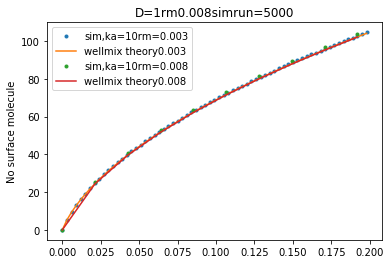

In [78]:
run()

ka=10,rm=0.005,actualA=2.5496,conc=49.2689,Ns=29440


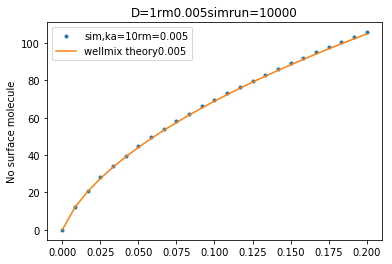

In [75]:
run()

ka=0.1,rm=0.008,actualA=2.5717,conc=48.7941,Ns=11600


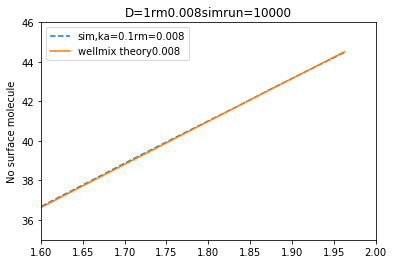

In [57]:
run()

ka=0.1,rm=0.003,actualA=2.5377,conc=49.5000,Ns=81396


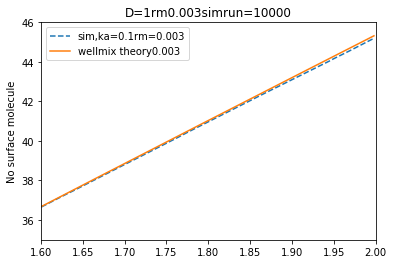

In [53]:
run()

ka=0.1,rm=0.005,actualA=2.5496,conc=49.2689,Ns=29440


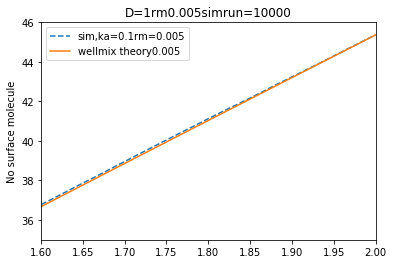

In [47]:
run()

ka=0.1,rm=0.005,actualA=4.0585,conc=6.1335,Ns=46864
79.0607
ka=0.1,rm=0.01,actualA=4.0987,conc=6.0734,Ns=11832
79.0471


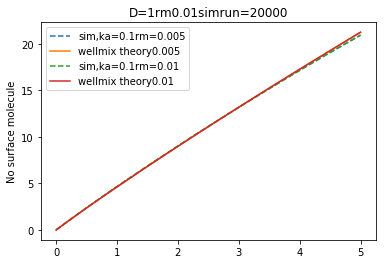

In [97]:
run()

DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/usr/local/lib/python3.5/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/usr/local/lib/python3.5/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


ka=0.1,rm=0.005,actualA=4.0585,conc=49.0682,Ns=46864


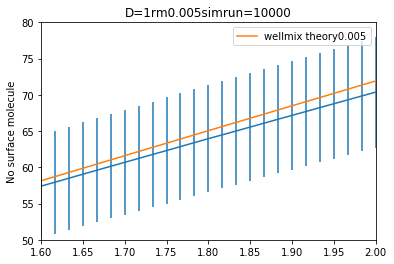

In [3]:
run()

ka=0.1,rm=0.005,actualA=4.0585,conc=49.0682,Ns=46864


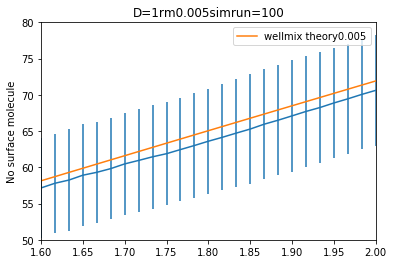

In [70]:
run()

ka=0.1,rm=0.005,actualA=4.0585,conc=49.0682,Ns=46864
ka=0.1,rm=0.01,actualA=4.0987,conc=48.1954,Ns=11832


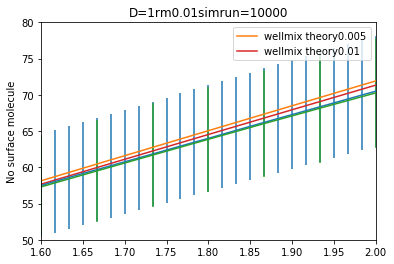

In [37]:
run()

0 0.1 0.005
1 10.0 0.005


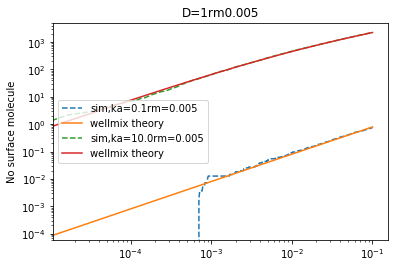

In [119]:
run()

0 0.1 0.003
1 0.1 0.005
2 0.1 0.01


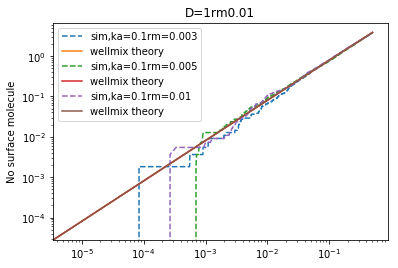

In [116]:
run()

0 10 0.003
1 10 0.005
2 10 0.01


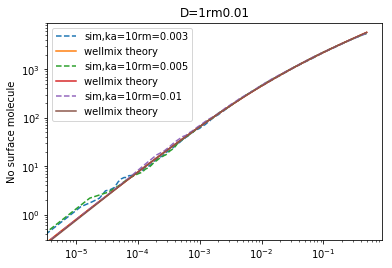

In [113]:
run()

0 0.010000000000000002
1 1.0


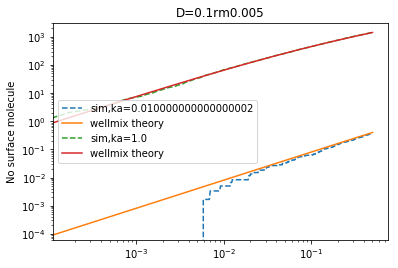

In [95]:
run()

0 1.0
1 100.0


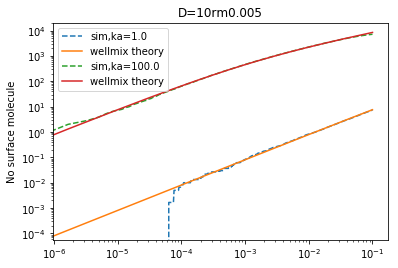

In [89]:
run()

0 0.1
1 10.0


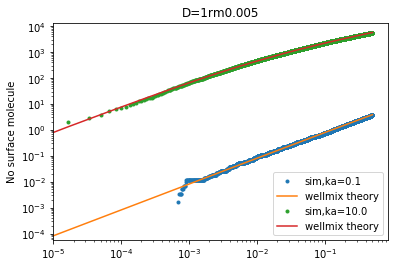

In [84]:
run()

(0, 1.5)

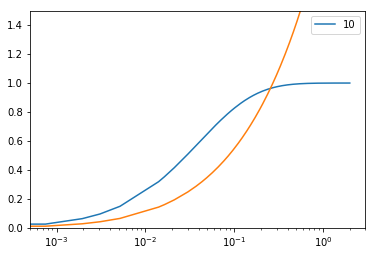

In [72]:
from math import sqrt,pi
from scipy.special import erfc

C=1./L
tt=np.logspace(-3,0,30)
kfacs=[10]
for i,kfac in enumerate(kfacs):
    #plt.semilogx(T[i],(1-Nlog[i]/NA),'.',label=kfacs[i])
    plt.semilogx(T[i],L*L*stheory(C,kfac,T[i]),label=ka)
    plt.semilogx(T[i],2*L*L*ST(kfac,L**3,T[i]))
plt.legend()
plt.ylim(0,1.5)

In [32]:
stheory(C,0.1,1e-3)

0.01840289424133198

In [ ]:
from ecell4 import *
%matplotlib inline
import numpy as np
import math
import sys
from math import sqrt
import matplotlib.pyplot as plt
from ecell4.extra import ensemble
import numpy as np
from math import pi

def wrap(job,job_id,task_id):
    def singlerun(ka,NA,L,run,duration,rm):
        import numpy as np
        D=1
        rng = GSLRandomNumberGenerator()
        rng.seed(run)   
        voxelr=rm    
        td =(2*voxelr)**2/(6*D)
        ori = Real3(0.5*L,0,0)
        #ori = Real3(0.5*L*2,0,0)
        unit0 = Real3(0,0,L)
        unit1 = Real3(0,L,0)        
        w = spatiocyte.SpatiocyteWorld(Real3(L,L,L),voxelr,rng)
        #w = spatiocyte.SpatiocyteWorld(Real3(L*2,L,L),voxelr,rng)
        size=tuple(w.calculate_shape(Real3(L,L,L),voxelr))
        lx,ly,lz=w.actual_lengths()
        Ns = size[1]*size[2]
        Area= ly*lz
        V=ly*lz*lx
        if run==1:
            print('actual A {}, V{},Ns{},td{}'.format(Area,V,Ns,td))
        w.add_structure(Species('M'),PlanarSurface(ori,unit0,unit1))
        with species_attributes():
            A |  {'D': str(D), 'radius':str(voxelr)}
            #B |  {'D': str(0), 'radius':str(voxelr),'location':'M'}

        with reaction_rules():#for spa and egfrd
            #A + M > B | ka
            A+M>M | ka

        m2 = get_model()
        w.bind_to(m2)
        
        
        w.add_molecules(Species('A'), NA)
        sim = spatiocyte.SpatiocyteSimulator(w)
        sim.initialize()
        #obs=FixedIntervalNumberObserver(td*1000,['A'])
        #sim.run(duration,obs)        
        #tlogs,nalog=np.array(obs.data()).T        
        tlogint = td*1000
        tlog=tlogint
        nalog=[]
        tlogs=[]
        prvA = NA
        nB=0
        while sim.t()<duration:
            cA = w.num_particles_exact(Species('A'))
            chg = abs(cA-prvA)
            if (chg!=0): 
                nB +=chg
                #print(chg)
                #w.add_molecules(Species('A'), chg)
                #prvA=cA+chg
                prvA=cA
            if sim.t()>=tlog:
                tlogs.append(sim.t())                              
                nalog.append(nB)
                tlog+=tlogint
            sim.step()        
        #assert(cA==NA)
        tlogs=np.array(tlogs)
        nalog=np.array(nalog)
        return tlogs,nalog,V,Area,Ns
    job.update({'run':task_id})
    out=singlerun(**job)
    return out


L=2.
dur=2
NA = 400
rm=0.005
simrun = 100
ka=0.1

TT=[]
NTs=[]
Vs = []
As=[]
Nss=[]
Stds=[]
print('ka',ka,'Na',NA)
rms=[0.005]
#for ka in kas:
for rm in rms:
    jobs = [{'ka':ka,'NA':NA,'L':L,'duration':dur,'rm':rm}]
    #res=ensemble.run_multiprocessing(wrap,jobs,n=simrun,nproc=60,modules=('numpy','ecell4','math'))[0]
    res=ensemble.run_slurm(wrap,jobs,n=simrun,nproc=500,path='tmp',modules=('numpy','ecell4','math'),extra_args=['--exclude=ibc[02,12,27]'])[0]
    res = np.array(res)
    T = res.T[0][0]   
    #print(res.T[1])
    #Nt = np.mean(res.T[1])
    Nt = sum(res.T[1])/simrun
    #print(Nt)
    std = np.std(res.T[1])
    Vs.append(res.T[2][0])
    As.append(res.T[3][0])
    Nss.append(res.T[4][0])
    TT.append(T)
    NTs.append(Nt)
    Stds.append(std)
print('finish')

In [101]:
def ST(ka,D,t): #from wellmixed theory (smoldyn2009)
    h = ka/D
    B=h*np.sqrt(D*t)
    return (erfcx(B)-1+2*h*np.sqrt(D*t/pi))


In [3]:
from ecell4 import *
%matplotlib inline
import numpy as np
import math
import sys
from math import sqrt
import matplotlib.pyplot as plt
from ecell4.extra import ensemble
import numpy as np
from math import pi

def wrap(job,job_id,task_id):
    def singlerun(ka,NA,L,run,duration):
        import numpy as np
        rng = GSLRandomNumberGenerator()
        rng.seed(run)
        rm = 0.005
        R=2*rm
        voxelr=rm
        D = 1.
        td =(2*voxelr)**2/(4*D)
        #print('td',td)
        H = 3*voxelr*2
        ori = Real3(0.5*H,0,0)
        unit0 = Real3(0,0,L)
        unit1 = Real3(0,L,0)        
        w = spatiocyte.SpatiocyteWorld(Real3(H,L,L),voxelr,rng)
        lx,ly,lz=w.actual_lengths()
        Area= ly*lz

        with species_attributes():
            B |  {'D': str(D), 'radius':str(voxelr),'location':'M'}
            A |  {'D': str(D), 'radius':str(voxelr)}

        with reaction_rules():#for spa and egfrd
            A + M > B | ka

        m2 = get_model()
        w.bind_to(m2)
        w.add_structure(Species('M'),PlanarSurface(ori,unit0,unit1))
        w.add_molecules(Species('A'), NA)
        sim = spatiocyte.SpatiocyteSimulator(w)
        sim.initialize()
        obs = NumberObserver(('A','B'))
        #obs=FixedIntervalNumberObserver(td,'A')
        #sim.run(duration)
        sim.run(duration,obs)        
        #print('ka',ka,'evaluated ka',res*Area/sim.dt()/NA/NB)        
        #obs=[0]
        tlogs,nalog,nblog=np.array(obs.data()).T
        return tlogs,nalog,nblog
    job.update({'run':task_id})
    out=singlerun(**job)
    return out

NA=500
L=1
ka = 1
dur=2

simrun=1

jobs=[{'ka':ka,'L':L,'NA':NA,'duration':dur}]
res=ensemble.run_multiprocessing(wrap,jobs,n=simrun,nproc=60,modules=('numpy','ecell4','math'))[0]
print('finish') 


finish


998785 10023.9
conc=0.0100


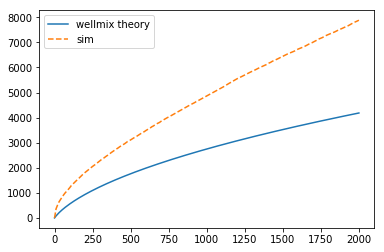

In [67]:
#name = '/home/chew/outputdata/ec3adsoprtionk01.csv'
name = '/home/chew/spatiocyte_example/accuracy/3D_to_2D_planar_adsorption/3D_lattice_2D_off_lattice/IterateLogk01.csv'
t,nt= (np.loadtxt(name,delimiter=',',skiprows=1)).T
NA = 10000
L=100
Vol=998785#L**3
Area=10023.9#L**2
print(Vol,Area)
conc = NA/Vol
ka=0.1
D=1
h=ka/D
print('conc={:.4f}'.format(conc))
plt.plot(t,conc*Area*ST(ka,D,t)/h,label='wellmix theory')
plt.plot(t,nt,'--',label='sim')
plt.legend()


8.00374 3.99636
conc=12.4942


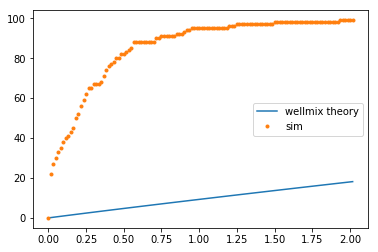

In [115]:
#name = '/home/chew/outputdata/ec3adsoprtionk01.csv'
name = '/home/chew/spatiocyte_example/accuracy/3D_to_2D_planar_adsorption/3D_lattice_2D_off_lattice/IterateLogk01.csv'
t,nt= (np.loadtxt(name,delimiter=',',skiprows=1)).T
NA = 100
L=2.
Vol=8.00374#L**3
Area=3.99636#L**2
print(Vol,Area)
conc = NA/Vol
ka=0.1
D=1
h=ka/D
print('conc={:.4f}'.format(conc))
plt.plot(t,2*conc*Area*ST(ka,D,t)/h,label='wellmix theory')
plt.plot(t,nt,'.',label='sim')
plt.legend()


In [43]:
3.39581e-15/1e-18

3395.8099999999995

In [44]:
15**3

3375

In [120]:
D=1
ka=1
rv=0.005
24*ka*rv/(6+3*sqrt(3)+2*sqrt(6)*D),ka*2*rv*sqrt(2)/sqrt(3)/D,ka*sqrt(2)/3/D/rv

(0.007455670489927411, 0.008164965809277261, 94.28090415820634)